This notebook generates solutions for problem set 1 of Anjali's qubits 101 course.

In [1]:
# Import statements:
import numpy as np
import scipy.linalg
from scipy.linalg import expm
import matplotlib.pyplot as plt
from matplotlib import rc
import scipy.constants as cnst
import schemdraw
import schemdraw.elements as elm
from PIL import Image
import h5py

In [2]:
plt.rcParams.update({'font.size': 8})
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})

In [3]:
def innerProduct(bra, ket):
    out = 0
    for i in range(len(bra)):
        out += np.conjugate(bra[i])*ket[i]
    return out

In [4]:
# Assuming the pages are 8.5 inches wide and have one inch margins, the total figure widths should not exceed 6.5 inches.

# Figure 2.1

This figure should illustrate the XY model of superconductivity. The left panel should be a distribution of disordered arrows (same length but randomly oriented), and the right panel should be a distribution of ordered arrows (same length and same orientation).

/var/folders/m8/gbh7nps52zzfb187_b37kb540000gn/T/ipykernel_46046/2792297484.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(axs[0].get_xticks(), fontsize=12)
/var/folders/m8/gbh7nps52zzfb187_b37kb540000gn/T/ipykernel_46046/2792297484.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_yticklabels(axs[0].get_yticks(), fontsize=12)
/var/folders/m8/gbh7nps52zzfb187_b37kb540000gn/T/ipykernel_46046/2792297484.py:64: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(axs[1].get_xticks(), fontsize=12)
/var/folders/m8/gbh7nps52zzfb187_b37kb540000gn/T/ipykernel_46046/2792297484.py:65: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_yticklabels(axs[1].get_yticks(), fontsize=12)


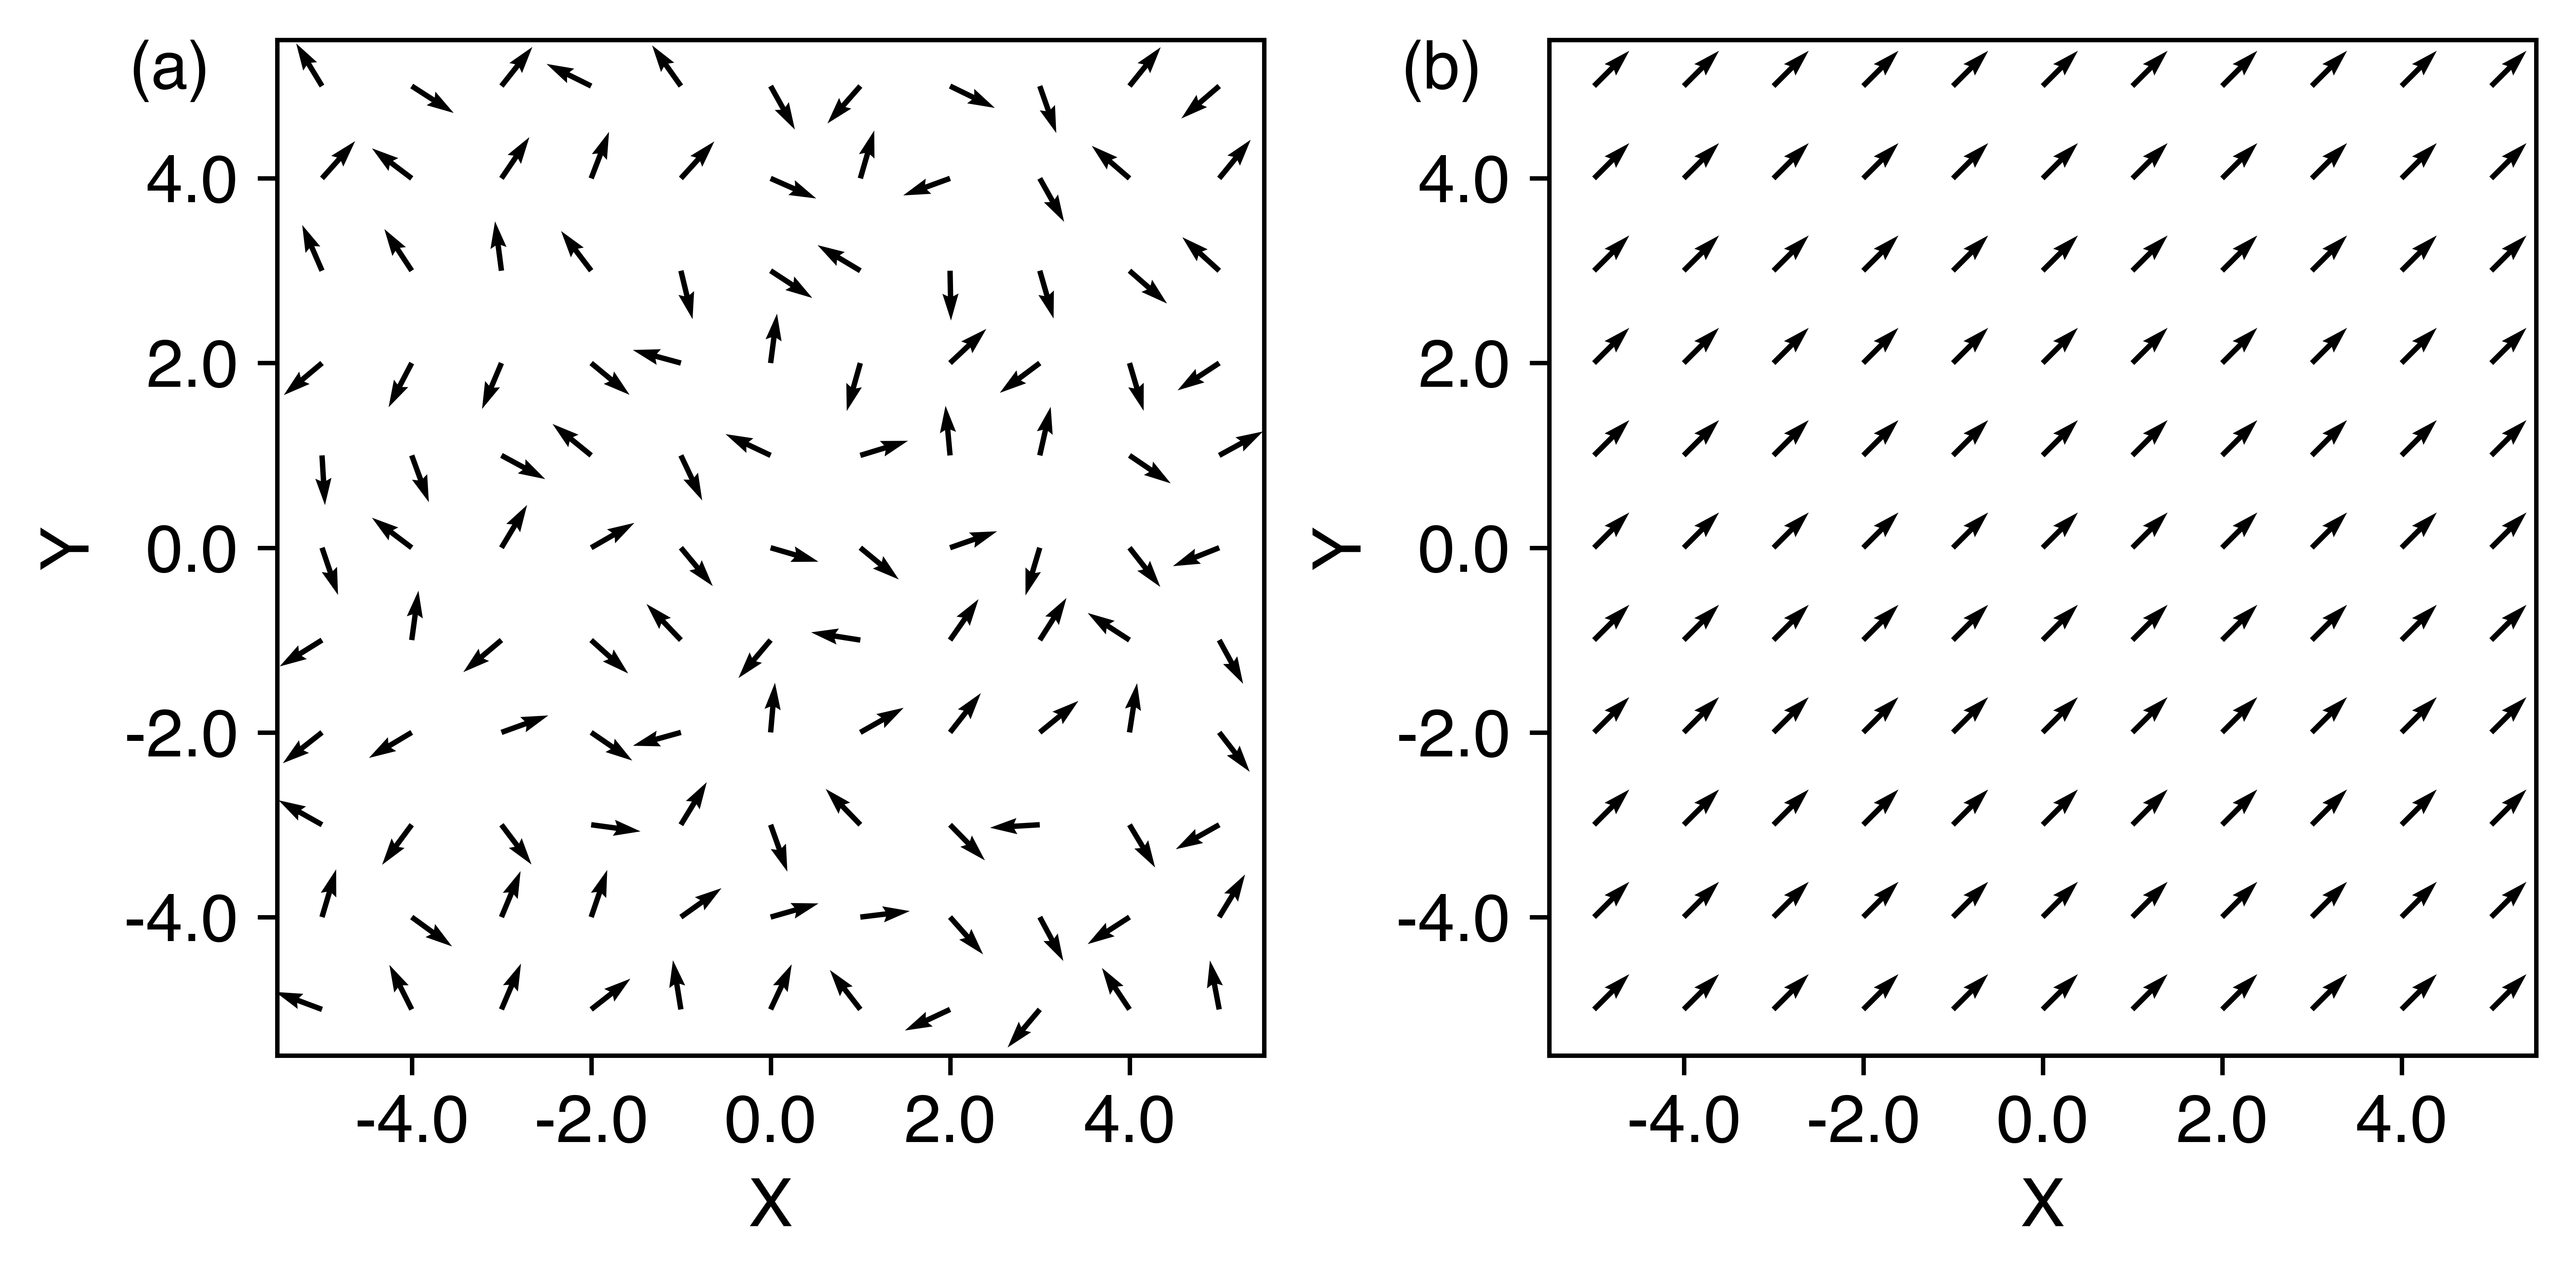

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(6.5, 3.25), dpi=1000)
dField = 10

## Random field:

# Define the grid
x = np.linspace(-(dField/2), dField/2, dField+1)
y = np.linspace(-(dField/2), dField/2, dField+1)
X, Y = np.meshgrid(x, y)

# Define the vector components
U = np.zeros((dField+1, dField+1))
V = np.zeros((dField+1, dField+1))
for i in range(dField+1):
    for j in range(dField+1):
        a = np.random.rand()
        b = 1-a
        if np.random.rand() > 0.5:
            uSign = 1
        else:
            uSign = -1
        if np.random.rand() > 0.5:
            vSign = 1
        else:
            vSign = -1
        u = np.sqrt(a)
        v = np.sqrt(b)
        U[i, j] = uSign*u
        V[i, j] = vSign*v

# Create the quiver plot
axs[0].quiver(X, Y, U, V)

# Add labels and title
axs[0].set_xlabel("X", fontsize=12)
axs[0].set_ylabel("Y", fontsize=12)
axs[0].set_xticklabels(axs[0].get_xticks(), fontsize=12)
axs[0].set_yticklabels(axs[0].get_yticks(), fontsize=12)
axs[0].text(-0.15, 1.0, '(a)', transform=axs[0].transAxes, fontsize=12, va='top', ha='left')

# Define the grid
x = np.linspace(-(dField/2), dField/2, dField+1)
y = np.linspace(-(dField/2), dField/2, dField+1)
X, Y = np.meshgrid(x, y)

# Define the vector components
U = np.zeros((dField+1, dField+1))
V = np.zeros((dField+1, dField+1))
for i in range(dField+1):
    for j in range(dField+1):
        a = 0.5
        b = 0.5
        u = np.sqrt(a)
        v = np.sqrt(b)
        U[i, j] = u
        V[i, j] = v

# Create the quiver plot
axs[1].quiver(X, Y, U, V)

# Add labels and title
axs[1].set_xlabel("X", fontsize=12)
axs[1].set_ylabel("Y", fontsize=12)
axs[1].set_xticklabels(axs[1].get_xticks(), fontsize=12)
axs[1].set_yticklabels(axs[1].get_yticks(), fontsize=12)
axs[1].text(-0.15, 1.0, '(b)', transform=axs[1].transAxes, fontsize=12, va='top', ha='left')

plt.tight_layout()
plt.savefig('fig2p1.pdf')
plt.show()

# Figure 2.2

This figure should illustrate the essential qualities of a quantized LC resonator. The left panel should be the circuit diagram of an LC resonator, and the right panel should be the associated potential well and eigenstates.

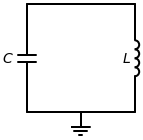

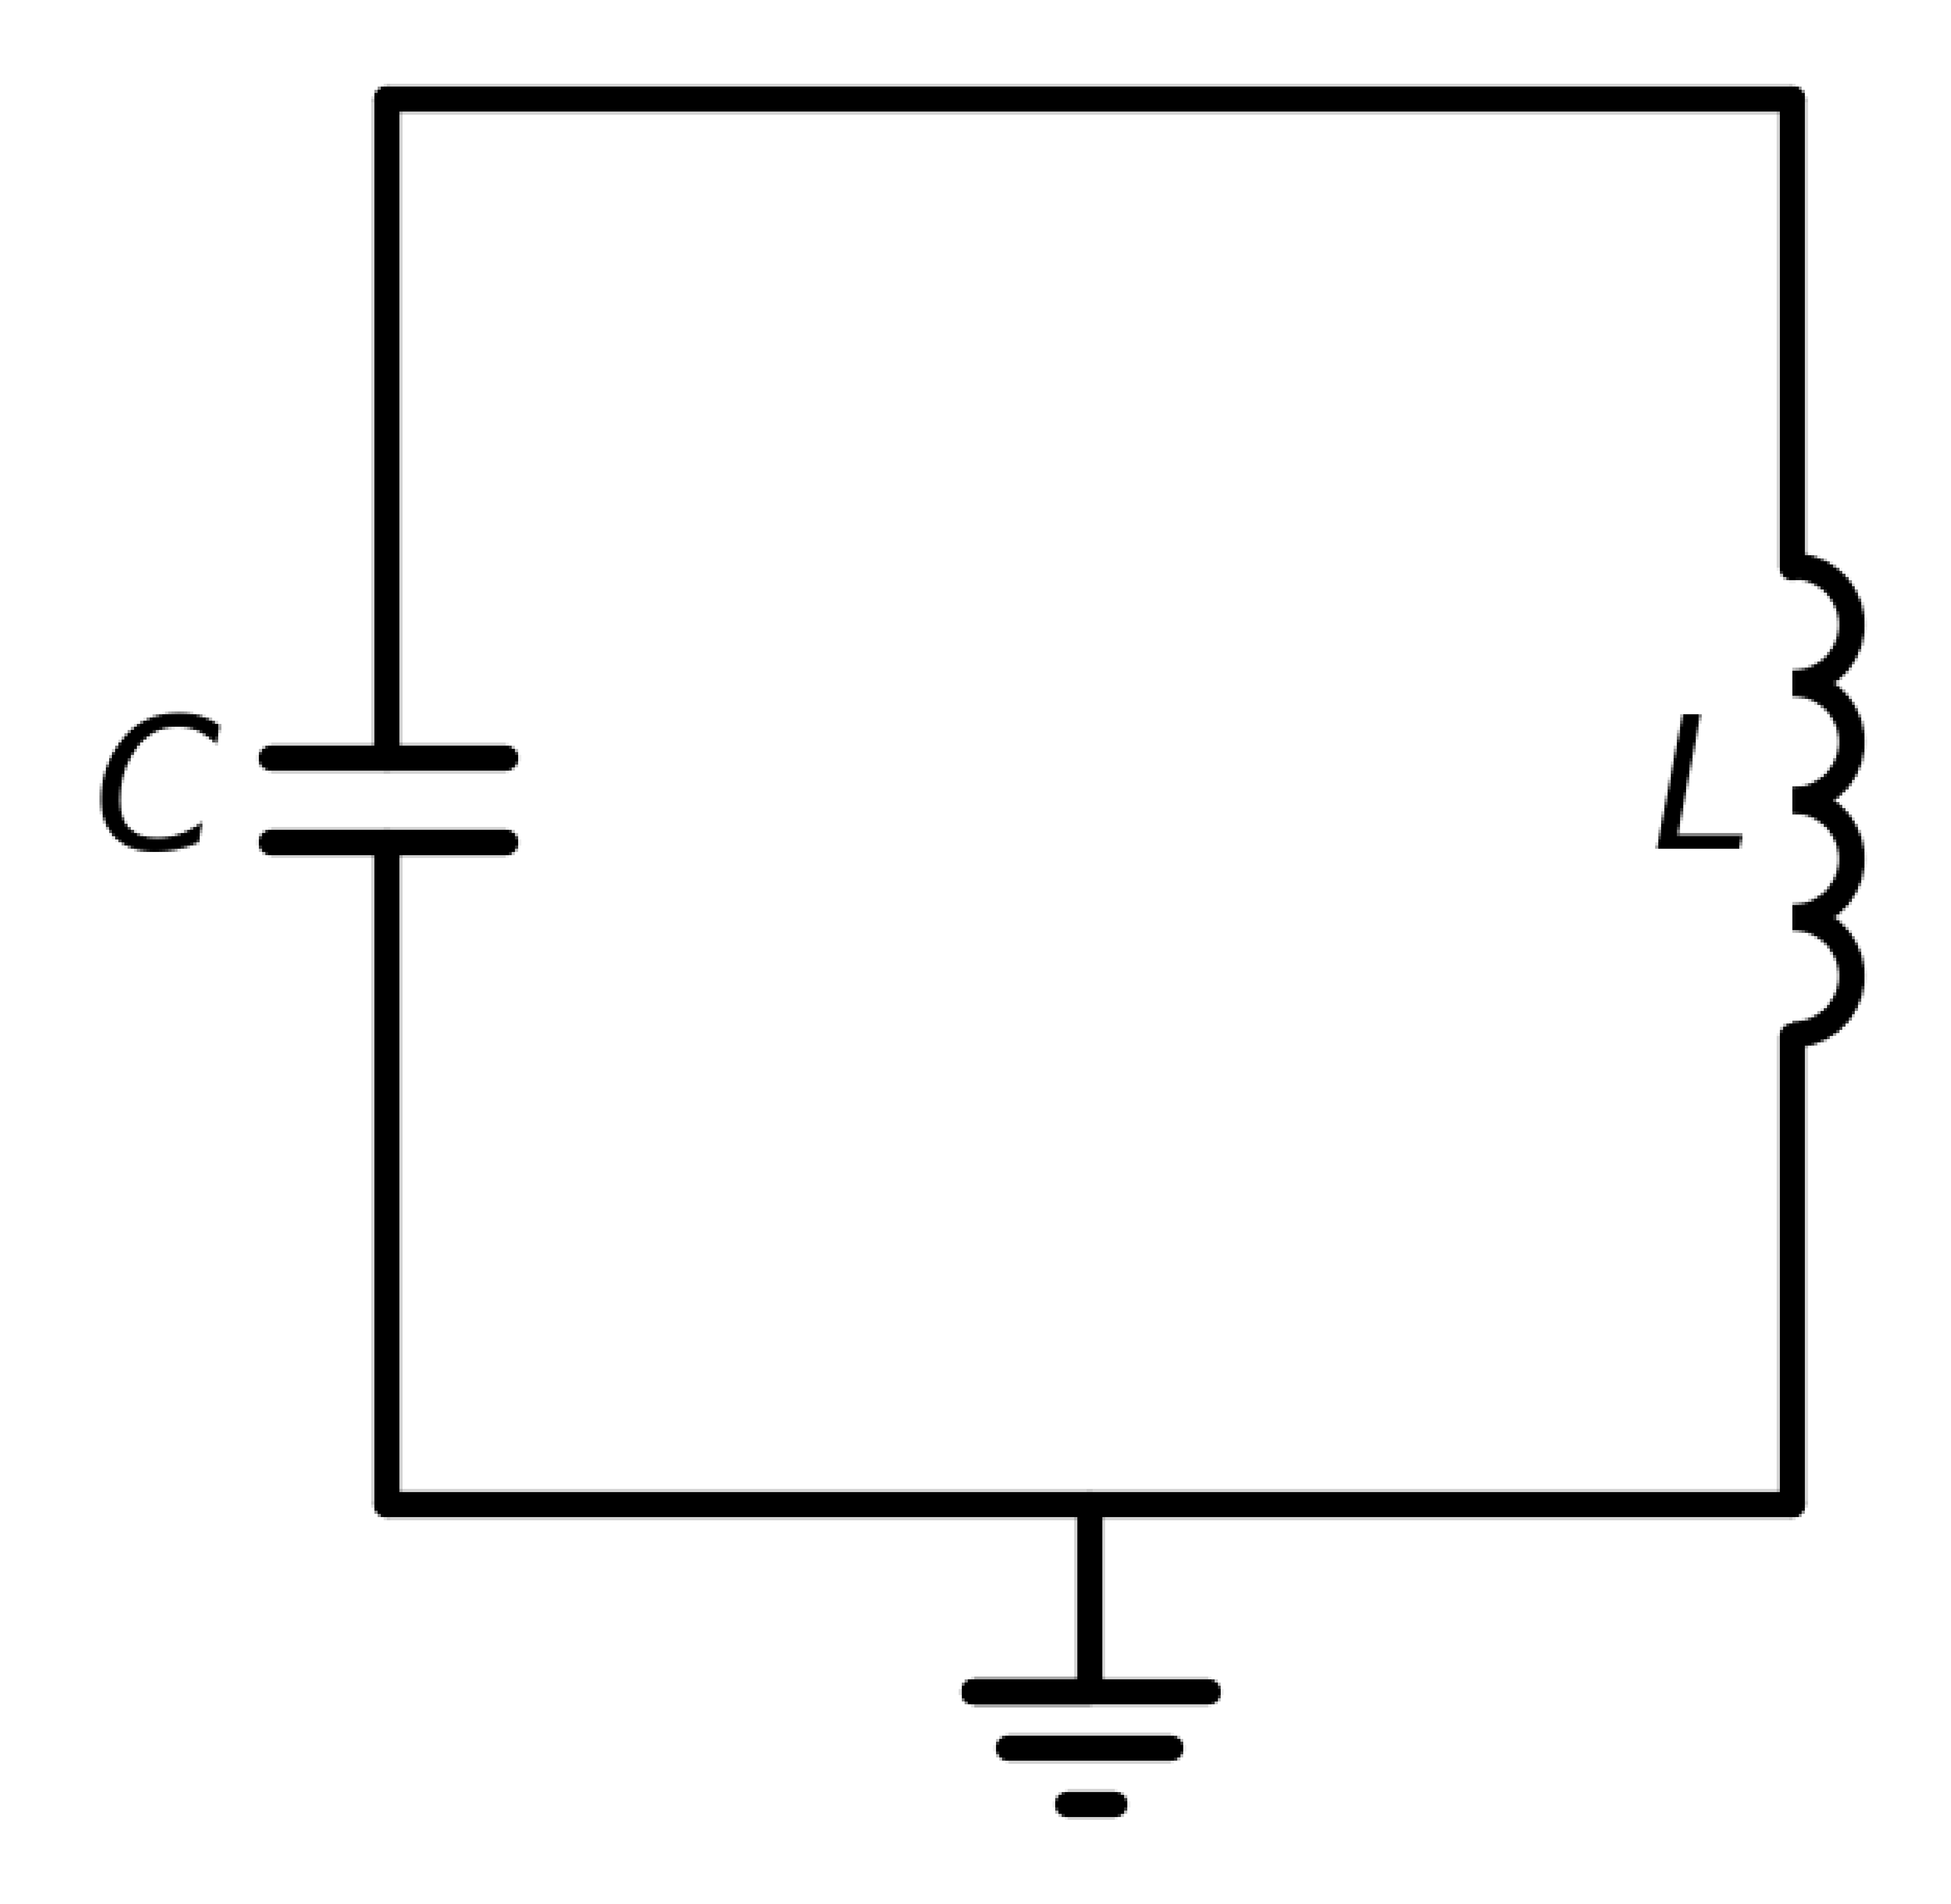

In [6]:
import schemdraw
import schemdraw.elements as elm
import matplotlib.pyplot as plt
from PIL import Image

# Create and save the schemdraw drawing as an image
with schemdraw.Drawing() as d:
    d += elm.Capacitor().up().label("$C$")
    d += elm.Line().right()
    d += elm.Inductor().down().label("$L$")
    groundLine = elm.Line().left()
    d += groundLine
    ground = elm.Ground()
    ground.at(groundLine.center)
    d += ground
    d.save("high_res_circuit.png", dpi=300)  # Change dpi to your desired resolution

# Load the saved image and integrate it into a matplotlib figure
img = Image.open('high_res_circuit.png')

fig, ax = plt.subplots(figsize=(6, 6), dpi=1000)
ax.imshow(img)
ax.axis('off')  # Hide axes for a clean look

plt.show()

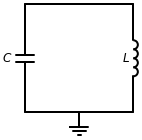

/Users/kevindcrowley/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/kevindcrowley/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/kevindcrowley/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/kevindcrowley/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/kevindcrowley/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to rea

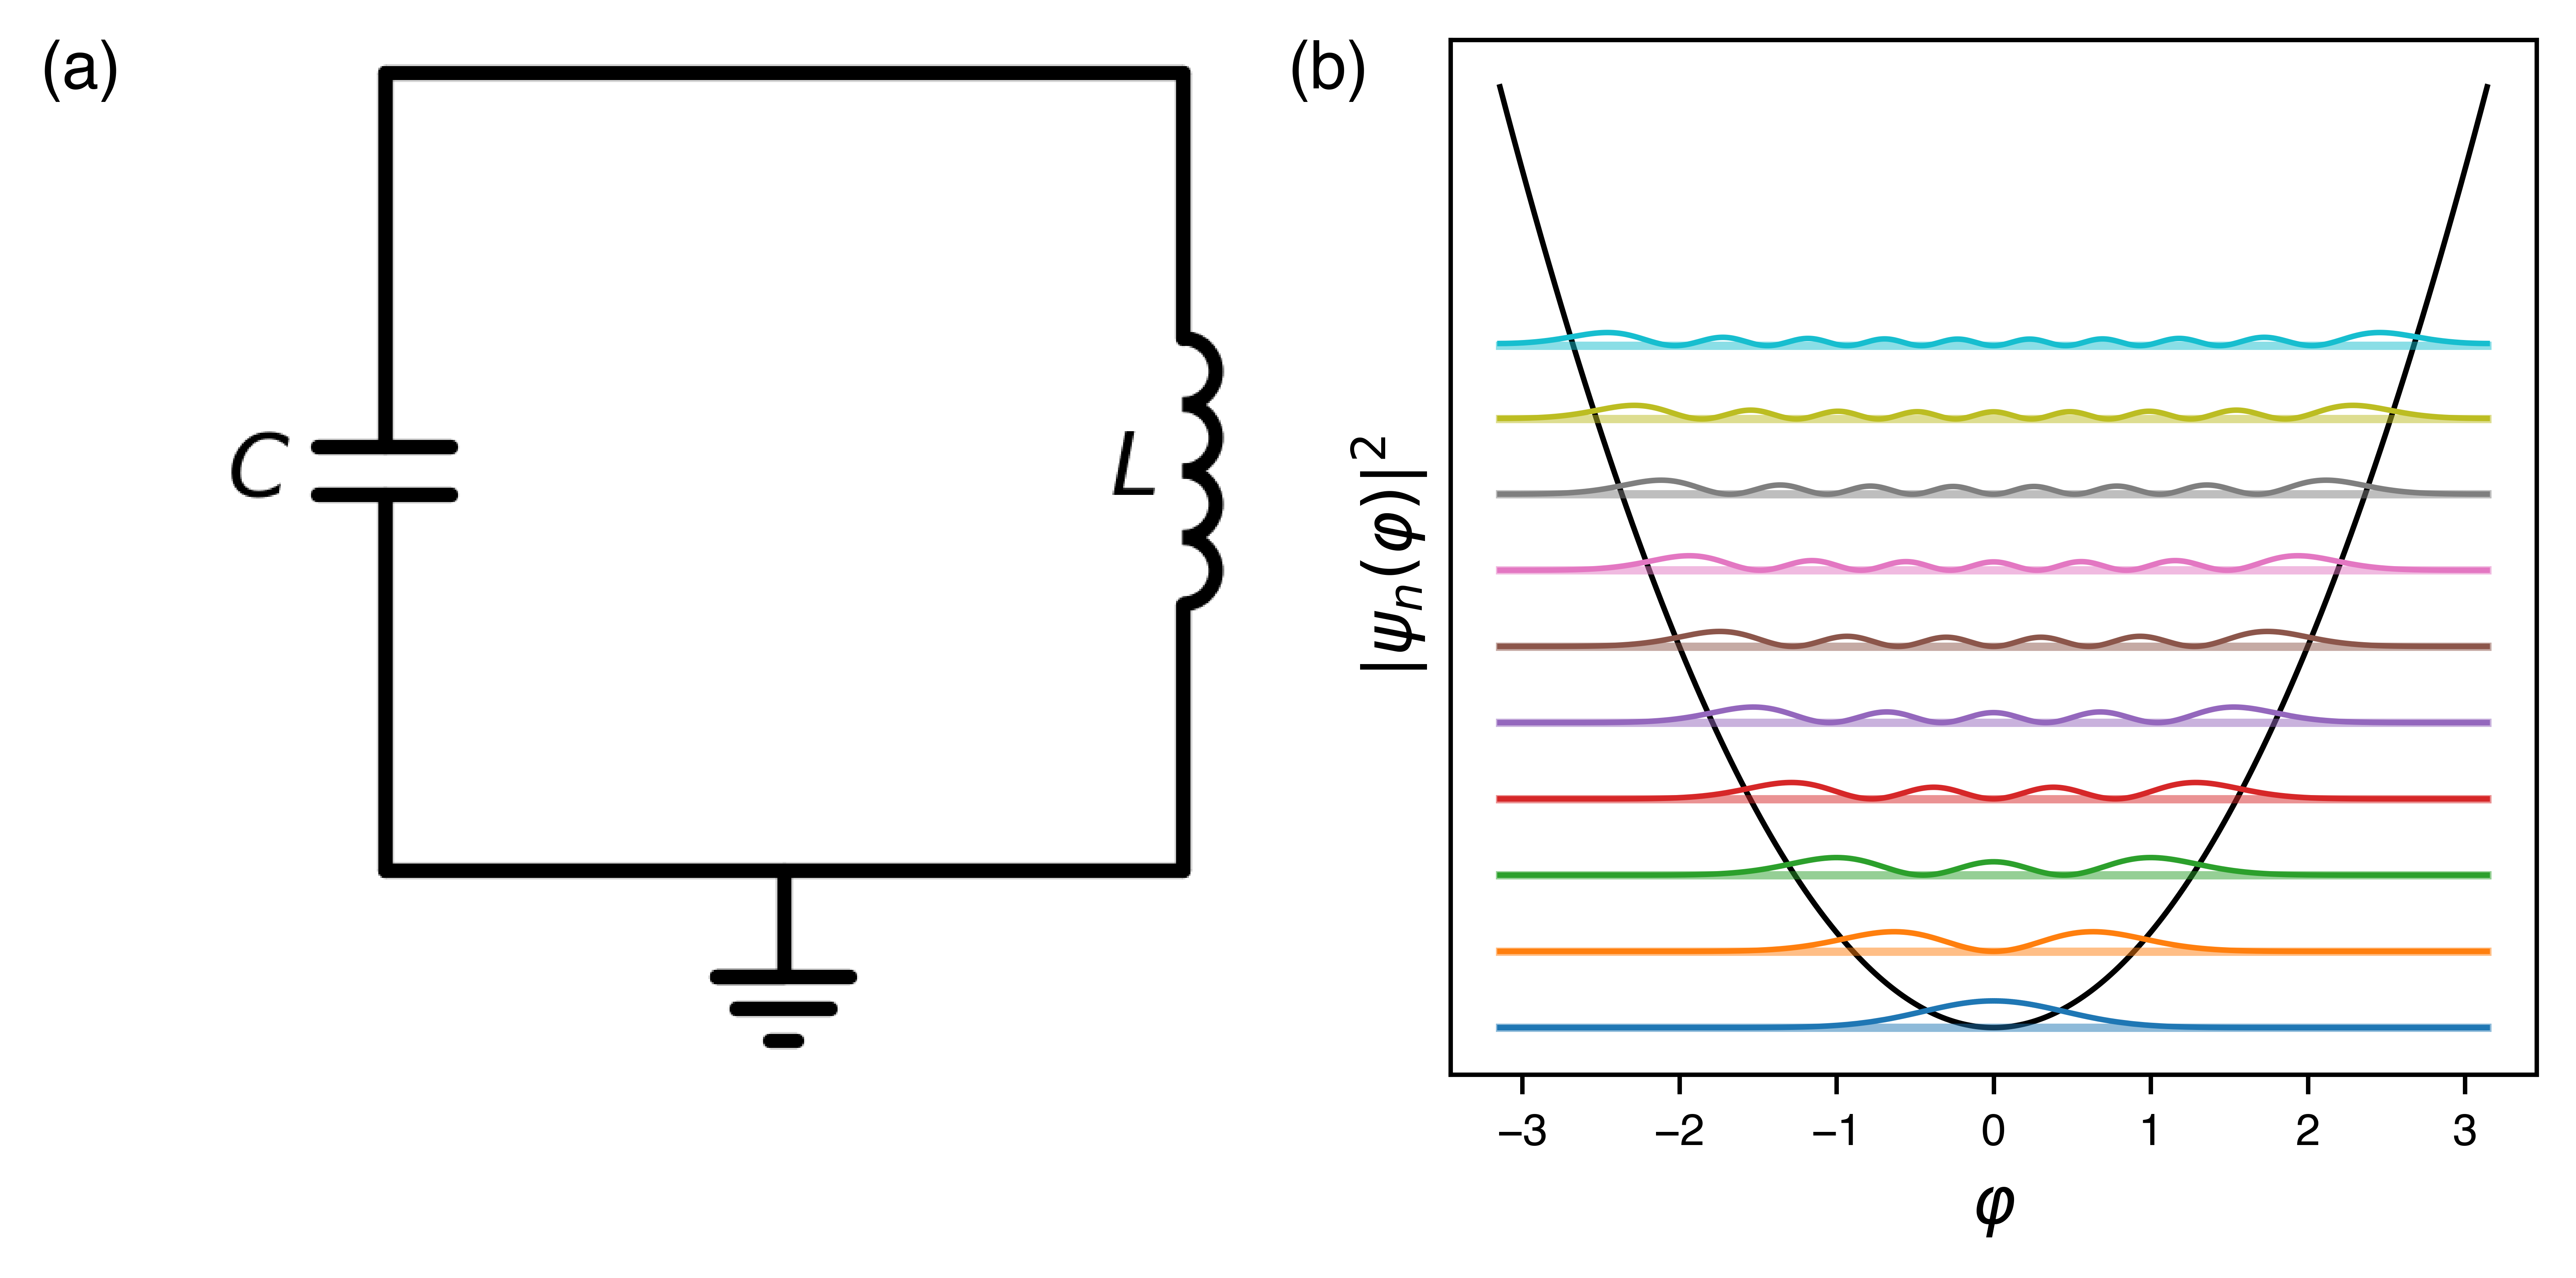

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(6.5, 3.25), dpi=1000)

## Subfigure (a):
with schemdraw.Drawing() as d:
    d += elm.Capacitor().up().label("$C$", fontsize=12)
    d += elm.Line().right()
    d += elm.Inductor().down().label("$L$", fontsize=12)
    groundLine = elm.Line().left()
    d += groundLine
    ground = elm.Ground()
    ground.at(groundLine.center)
    d += ground
    d.save("lcResonator.png", dpi=300)  # Change dpi to your desired resolution

# Load the saved image and integrate it into a matplotlib figure
img = Image.open('lcResonator.png')

axs[0].imshow(img)
axs[0].axis('off')  # Hide axes for a clean look
axs[0].text(-0.15, 1.0, '(a)', transform=axs[0].transAxes, fontsize=12, va='top', ha='left')

## Subfigure (b):
EL = 10e9 # Hz
EC = 200e6 # Hz

Nphi = 1000 # Number of phi intervals
dphi = 2*np.pi/Nphi
phis = np.arange(-np.pi, np.pi + dphi, dphi)
phi = np.matrix(np.diag(phis), dtype=complex)
n = -(1j/(2*dphi))*np.matrix(np.diag(np.repeat(-1, Nphi), -1) + np.diag(np.repeat(1, Nphi), -1).T, dtype=complex)
n.itemset((0, Nphi), 1j/(2*dphi))
n.itemset((Nphi, 0), -1j/(2*dphi))
h = 4*EC*(n**2) + 0.5*EL*(phi**2)

energyEigVals, energyEigVecs = scipy.linalg.eigh(h)

# level = 1
# ax.plot(phis, energyEigVecs[:, level]*np.conj(energyEigVecs[:, level]))

normV = 25
normOff = 25
axs[1].plot(phis, 0.5*(phis**2)/normV, color='black', label='$V(\phi)$', linewidth=1)
levels = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
for level in levels:
    colorInd = int(level/2)
    axs[1].plot(phis, energyEigVecs[:, level]*np.conj(energyEigVecs[:, level]) + ((energyEigVals[level] - energyEigVals[0])/(EL*normOff)),
           linewidth=1, color='C' + str(colorInd))
    axs[1].plot(phis, np.full(len(phis), ((energyEigVals[level] - energyEigVals[0])/(EL*normOff))), color='C' + str(colorInd), alpha=0.5)
axs[1].set_xlabel('$\\varphi$', fontsize=12)
# axs[1].set_ylabel('$|\langle \\varphi | \psi_n \\rangle|^2 + (E_n - E_0)$', fontsize=12)
axs[1].set_ylabel('$| \\psi_n (\\varphi) |^2$', fontsize=12) # Changed after comment from Andrew
axs[1].tick_params(axis='y', which='both', left=False, labelleft=False)
axs[1].text(-0.15, 1.0, '(b)', transform=axs[1].transAxes, fontsize=12, va='top', ha='left')
plt.tight_layout()
plt.savefig('fig2p2.pdf')

# Figure 2.3

This figure should illustrate the essential qualities of a Josephson Junction. The left panel should be a diagram of a Josephson Junction, showing the two superconducting leads separated by a small insulating barrier, and the right panel should be an SEM image of a Josephson Junction.

# Figure 2.4

This figure should be the circuit diagram of a cooper pair box / transmon.

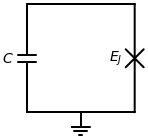

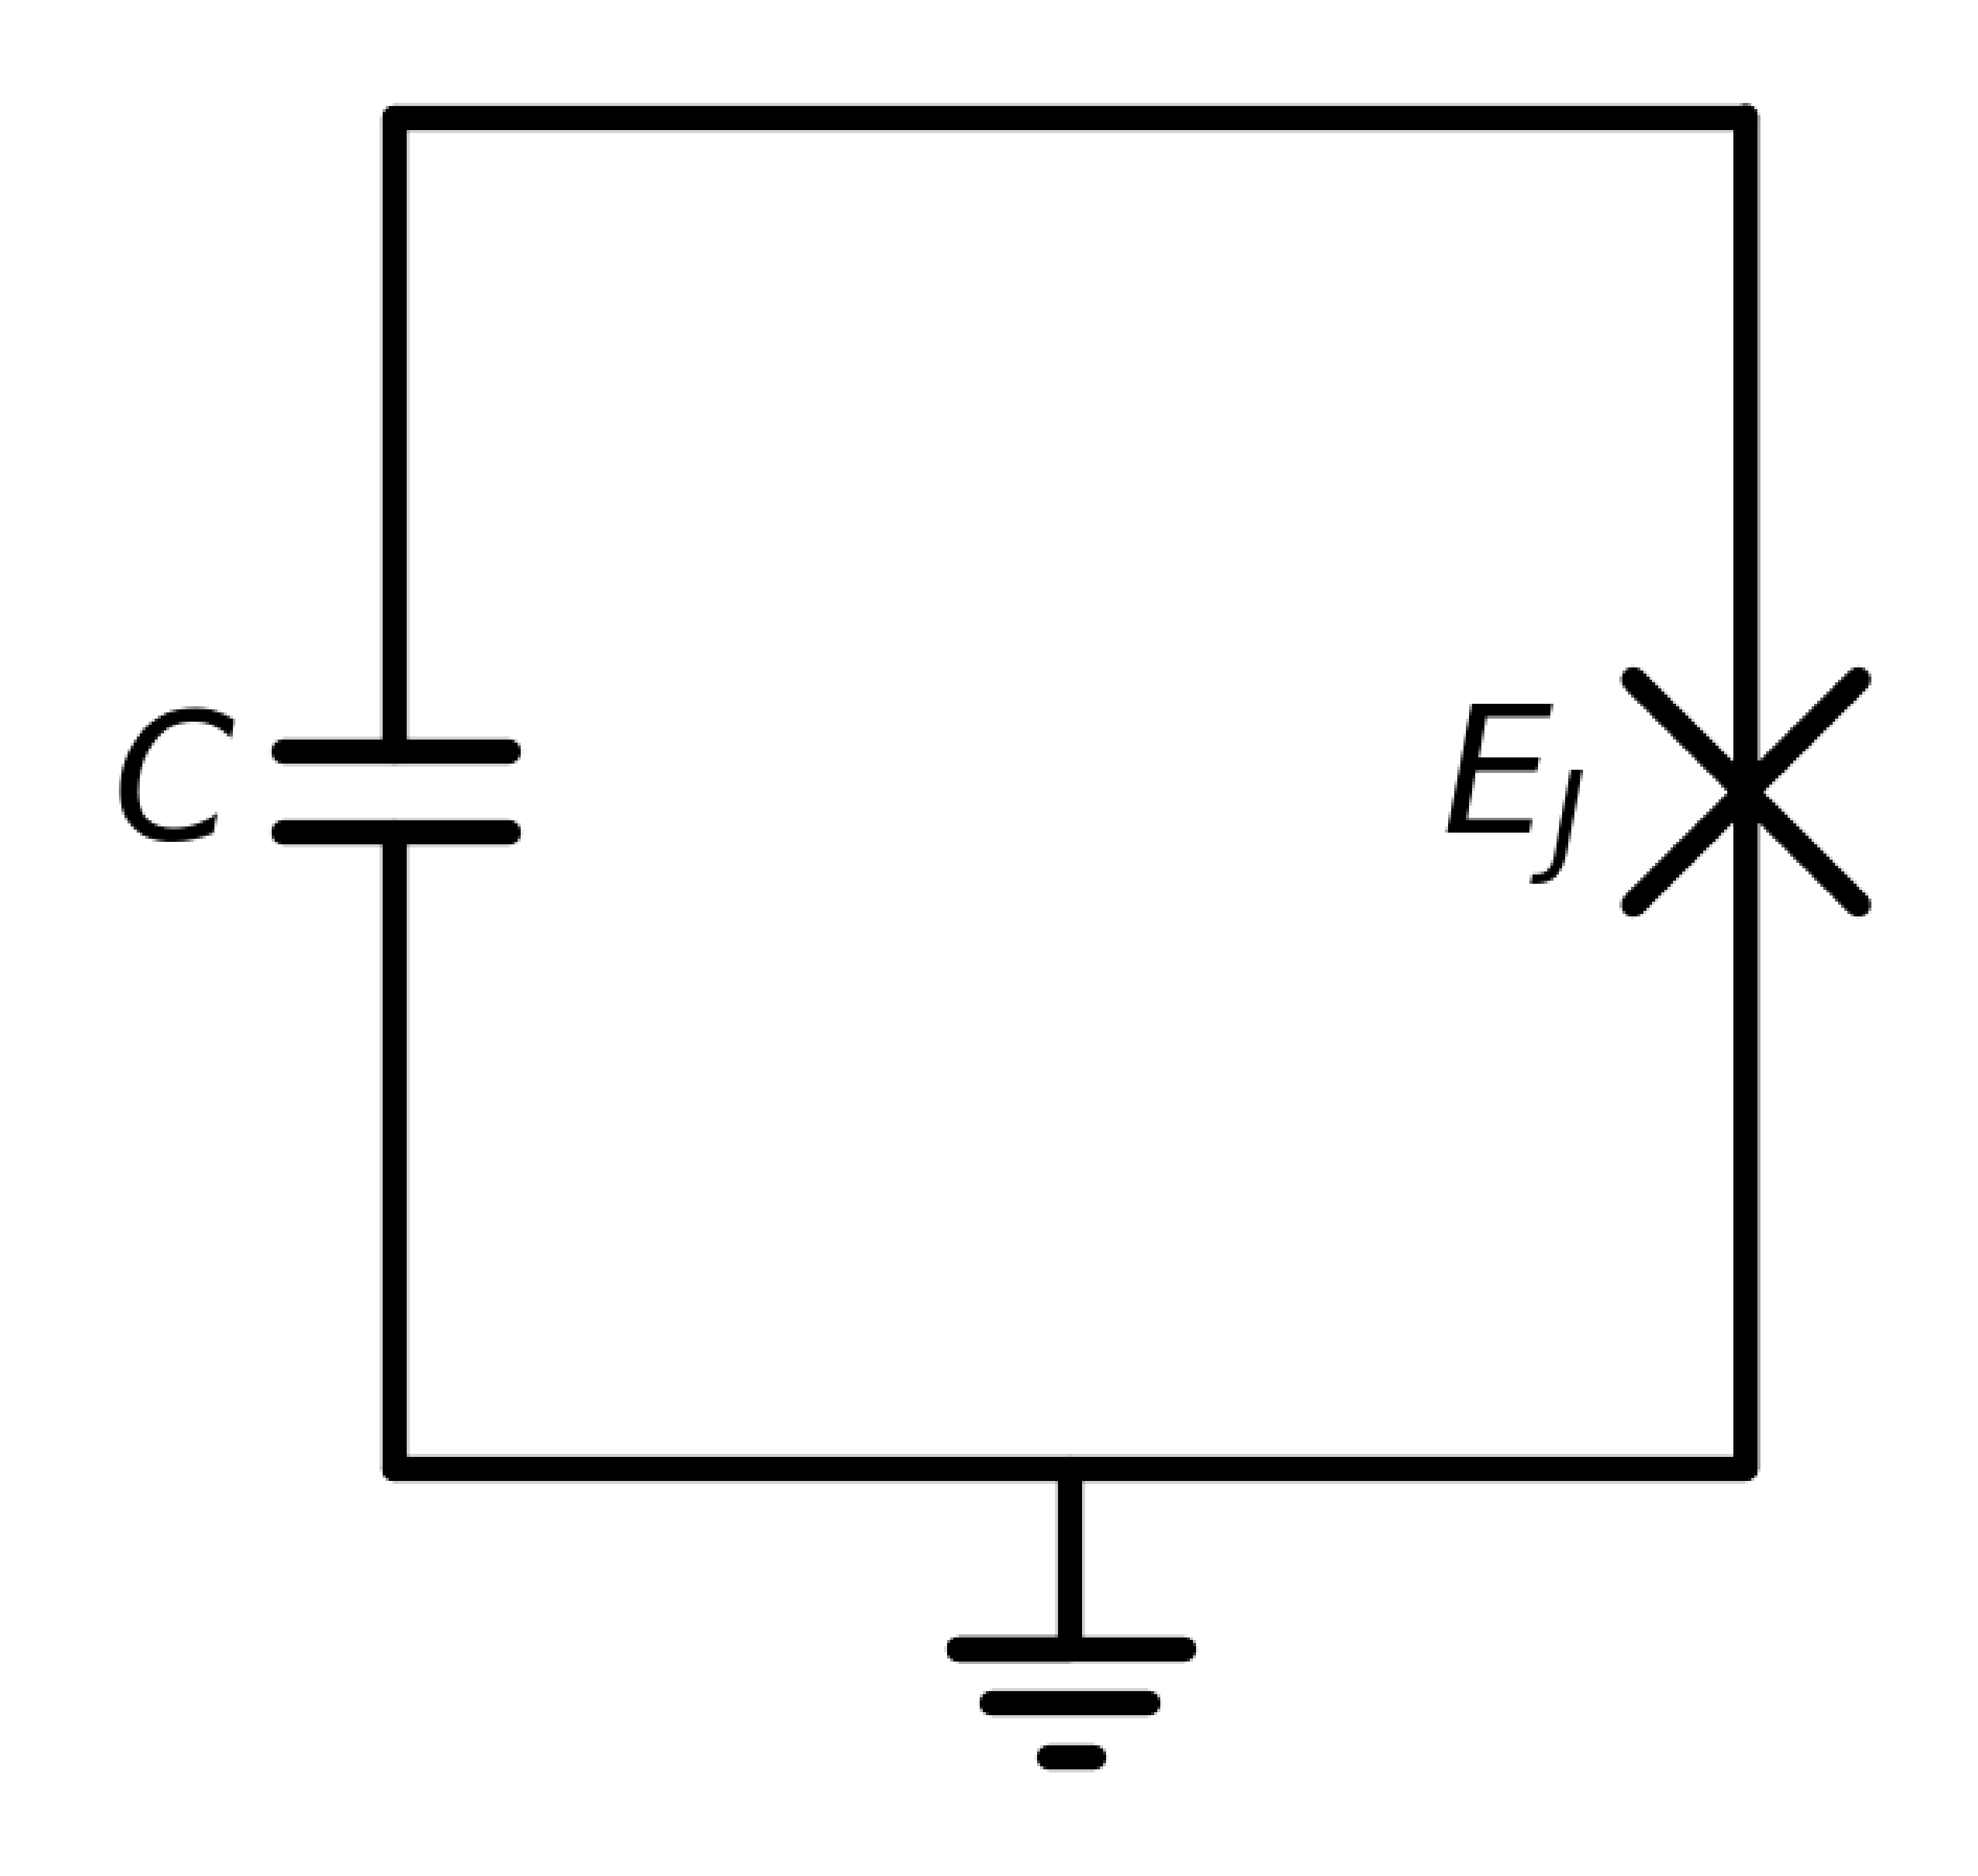

In [157]:
fig, ax = plt.subplots(figsize=(3.25, 3.25), dpi=1000)

## Subfigure (a):
with schemdraw.Drawing() as d:
    d += elm.Capacitor().up().label("$C$")
    d += elm.Line().right()
    d += elm.Josephson().down().label("$E_J$")
    groundLine = elm.Line().left()
    d += groundLine
    ground = elm.Ground()
    ground.at(groundLine.center)
    d += ground
    d.save("transmon.png", dpi=300)  # Change dpi to your desired resolution

# Load the saved image and integrate it into a matplotlib figure
img = Image.open('transmon.png')

ax.imshow(img)
ax.axis('off')  # Hide axes for a clean look
plt.tight_layout()
plt.savefig('fig2p4.pdf')

# Figure 2.5

This figure should illustrate the fact that CPB eigenstates are approximately eigenstates of the number operator. The left panel should show the first three eigenstates of the CPB Hamiltonian, and the right panel should show the associated charge dispersion of those three states.

/Users/kevindcrowley/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/kevindcrowley/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


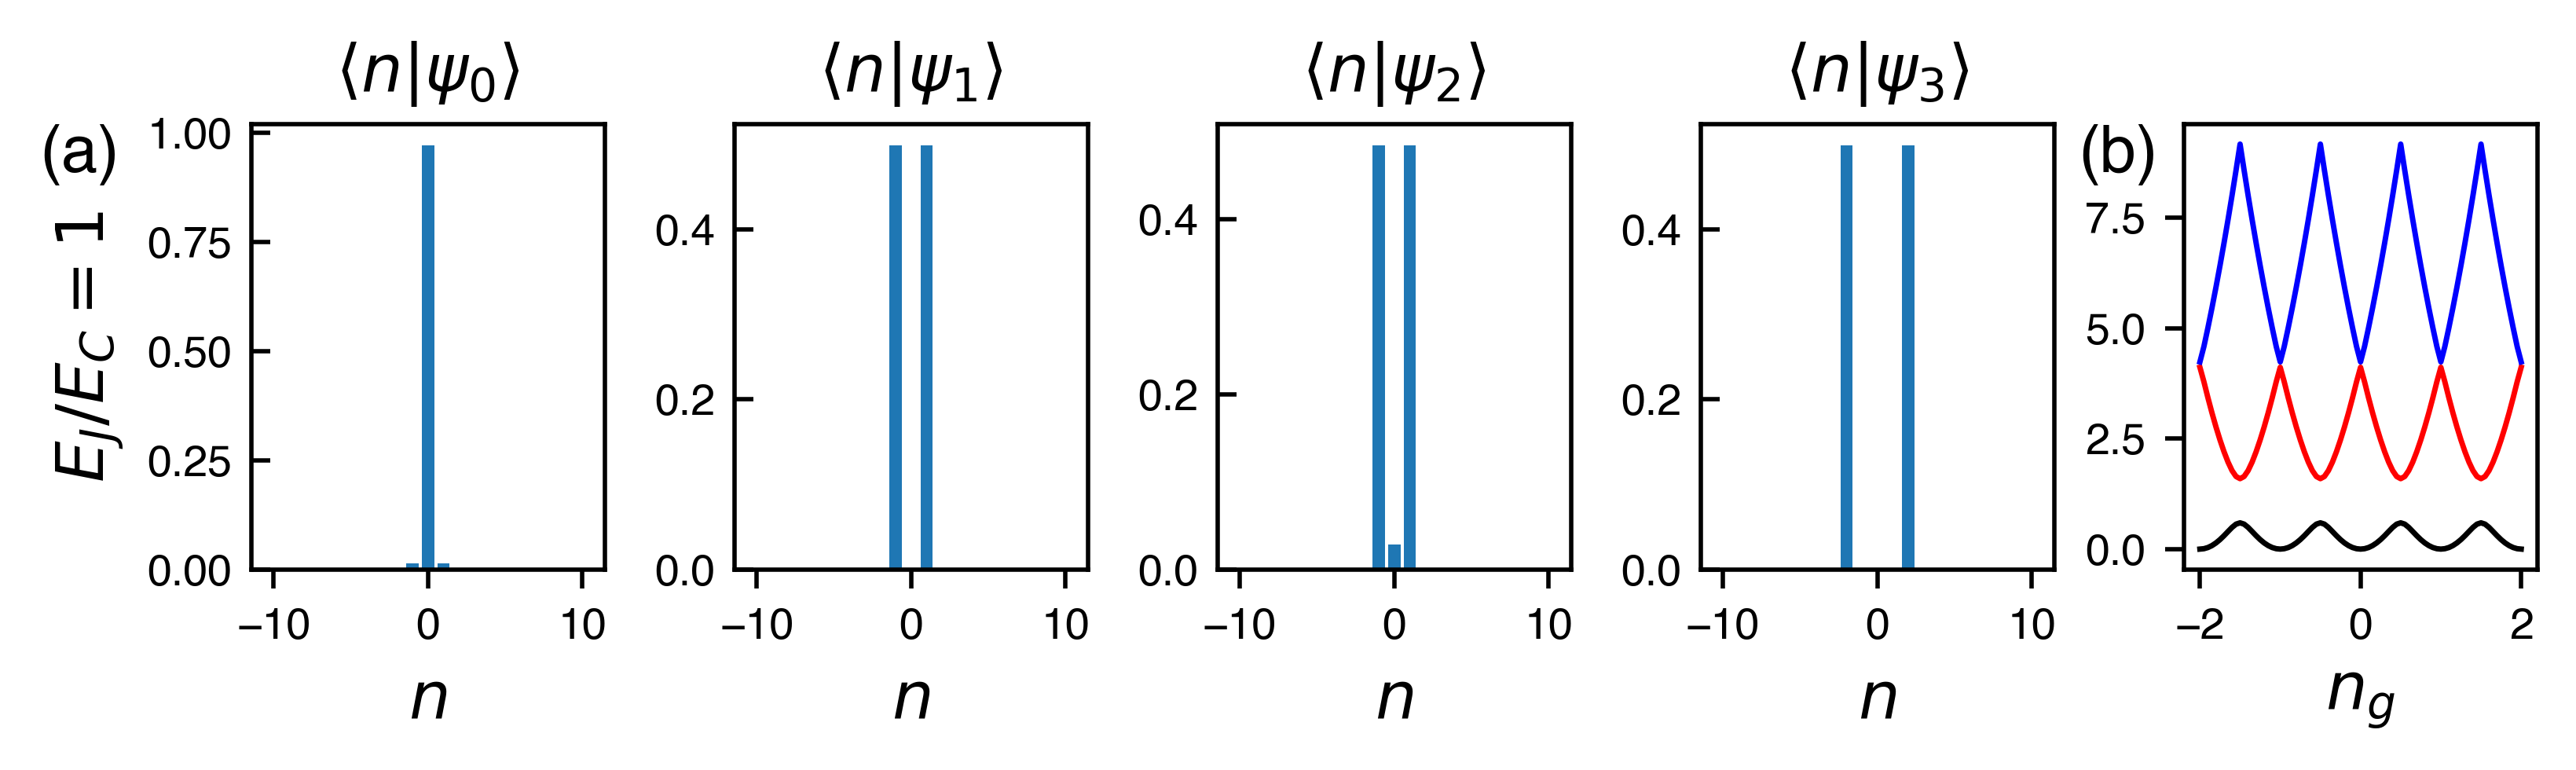

In [179]:
# Define the charge number operator Hamiltonian:
def nHat(nLevels):
    n = np.matrix(np.diag(np.arange(-nLevels, nLevels+1, 1)), dtype=complex)
    return n

def cosPhiHat(nLevels):
    cosPhi = np.matrix(np.diag(np.repeat(0.5, 2*nLevels), -1) + np.diag(np.repeat(0.5, 2*nLevels), -1).T, dtype=complex)
    return cosPhi

# Define the transmon Hamiltonian:
def hTransmon(EJ, EC, nG, nLevels):
    n = nHat(nLevels)
    cosPhi = cosPhiHat(nLevels)
    eye = np.matrix(np.diag(np.repeat(1, 1 + 2*nLevels)), dtype=complex)
    H = 4*EC*((n-(nG*eye))**2) - EJ*cosPhi
    return H

# Set the number of |n> states to be used in the simulation:
nLevels = 10 # Number of charge states considered (basis runs from -nLevels to nLevels)

# Set nG:
nG = 0 # Value used in this problem of the problem set.
n = nHat(nLevels)
nEigVals, nEigVecs = scipy.linalg.eigh(n)
ns = []
for nEigVal in nEigVals:
    ns.append(nEigVal)

EJ = 10e9 # Hz
EJoverECs = [1]
nEnergies = 4 # Number of energy eigenstate wavefunctions to plot (the number of rows in the plot)

fig, axs = plt.subplots(len(EJoverECs), nEnergies+1, figsize=(6.5, 2), dpi=500, sharey=False)

for i, EJoverEC in enumerate(EJoverECs):
    # Instantiate the Hamiltonian:
    h = hTransmon(EJ, EJ/EJoverEC, nG, nLevels)

    # Diagonalize the charge number operator and the Hamiltonian:
    energyEigVals, energyEigVecs = scipy.linalg.eigh(h)

    amplitudes = {}
    for j in range(len(energyEigVals)):
        amplitudes[j] = []
        for k, nEigVal in enumerate(nEigVals):
            overlap = innerProduct(nEigVecs[k], energyEigVecs[:, j])
            amplitude = np.conjugate(overlap)*overlap
            amplitudes[j].append(amplitude)
    
    for j in range(nEnergies):
        ind = j # Current energy eigenstate index
        axs[j].bar(ns, amplitudes[ind])
        axs[j].tick_params(axis='y', direction='in')
        if j == 0: # Here we are at the left and need to add a y-label:
            axs[j].set_ylabel('$E_J/E_C = %d$' % EJoverEC, fontsize=12)
        if i == 0: # Here we are at the top and need to set the title:
            axs[j].set_title('$\langle n | \psi_%d \\rangle$' % ind, fontsize=12)
        if i == len(EJoverECs)-1:
            axs[j].set_xlabel('$n$', fontsize=12)
        else:
            axs[j].tick_params(axis='x', which='both', bottom=False, labelbottom=False)
                
ngMin = -2
ngMax = 2
ngStep = 0.05
ngs = np.arange(ngMin, ngMax+ngStep, ngStep)
colors = ['black', 'red', 'blue']
for i, EJoverEC in enumerate(EJoverECs):
    transitions = []
    for j in range(nEnergies-1):
        transitions.append([])
    
    energyEigVals, energyEigVecs = scipy.linalg.eigh(hTransmon(EJ, EJ/EJoverEC, 0.5, nLevels))
    norm = energyEigVals[1] - energyEigVals[0]
    energyEigVals, energyEigVecs = scipy.linalg.eigh(hTransmon(EJ, EJ/EJoverEC, 0, nLevels))
    offset = energyEigVals[0]
    for ng in ngs:
        energyEigVals, energyEigVecs = scipy.linalg.eigh(hTransmon(EJ, EJ/EJoverEC, ng, nLevels))
        for j in range(nEnergies-1):
            transitions[j].append( (energyEigVals[j] - offset) / norm )
    for j in range(nEnergies-1):
        axs[nEnergies].plot(ngs, transitions[j], linewidth='1', color=colors[j])
        if i == len(EJoverECs)-1:
            axs[nEnergies].set_xlabel('$n_g$', fontsize=12)
        else:
            axs[nEnergies].tick_params(axis='x', which='both', bottom=False, labelbottom=False)          

plt.tight_layout()

axs[0].text(-0.6, 1.0, '(a)', transform=axs[0].transAxes, fontsize=12, va='top', ha='left')
axs[4].text(-0.3, 1.0, '(b)', transform=axs[4].transAxes, fontsize=12, va='top', ha='left')

plt.savefig('fig2p5.pdf')

# Figure 2.6

This figure should illustrate the benefit of increasing EJ/EC. The left panel should show the first three eigenstates of the transmon Hamiltonian at EJ/EC's of 1, 5, 10, 50. The right panel should show the associated charge dispersions.

/Users/kevindcrowley/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/kevindcrowley/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


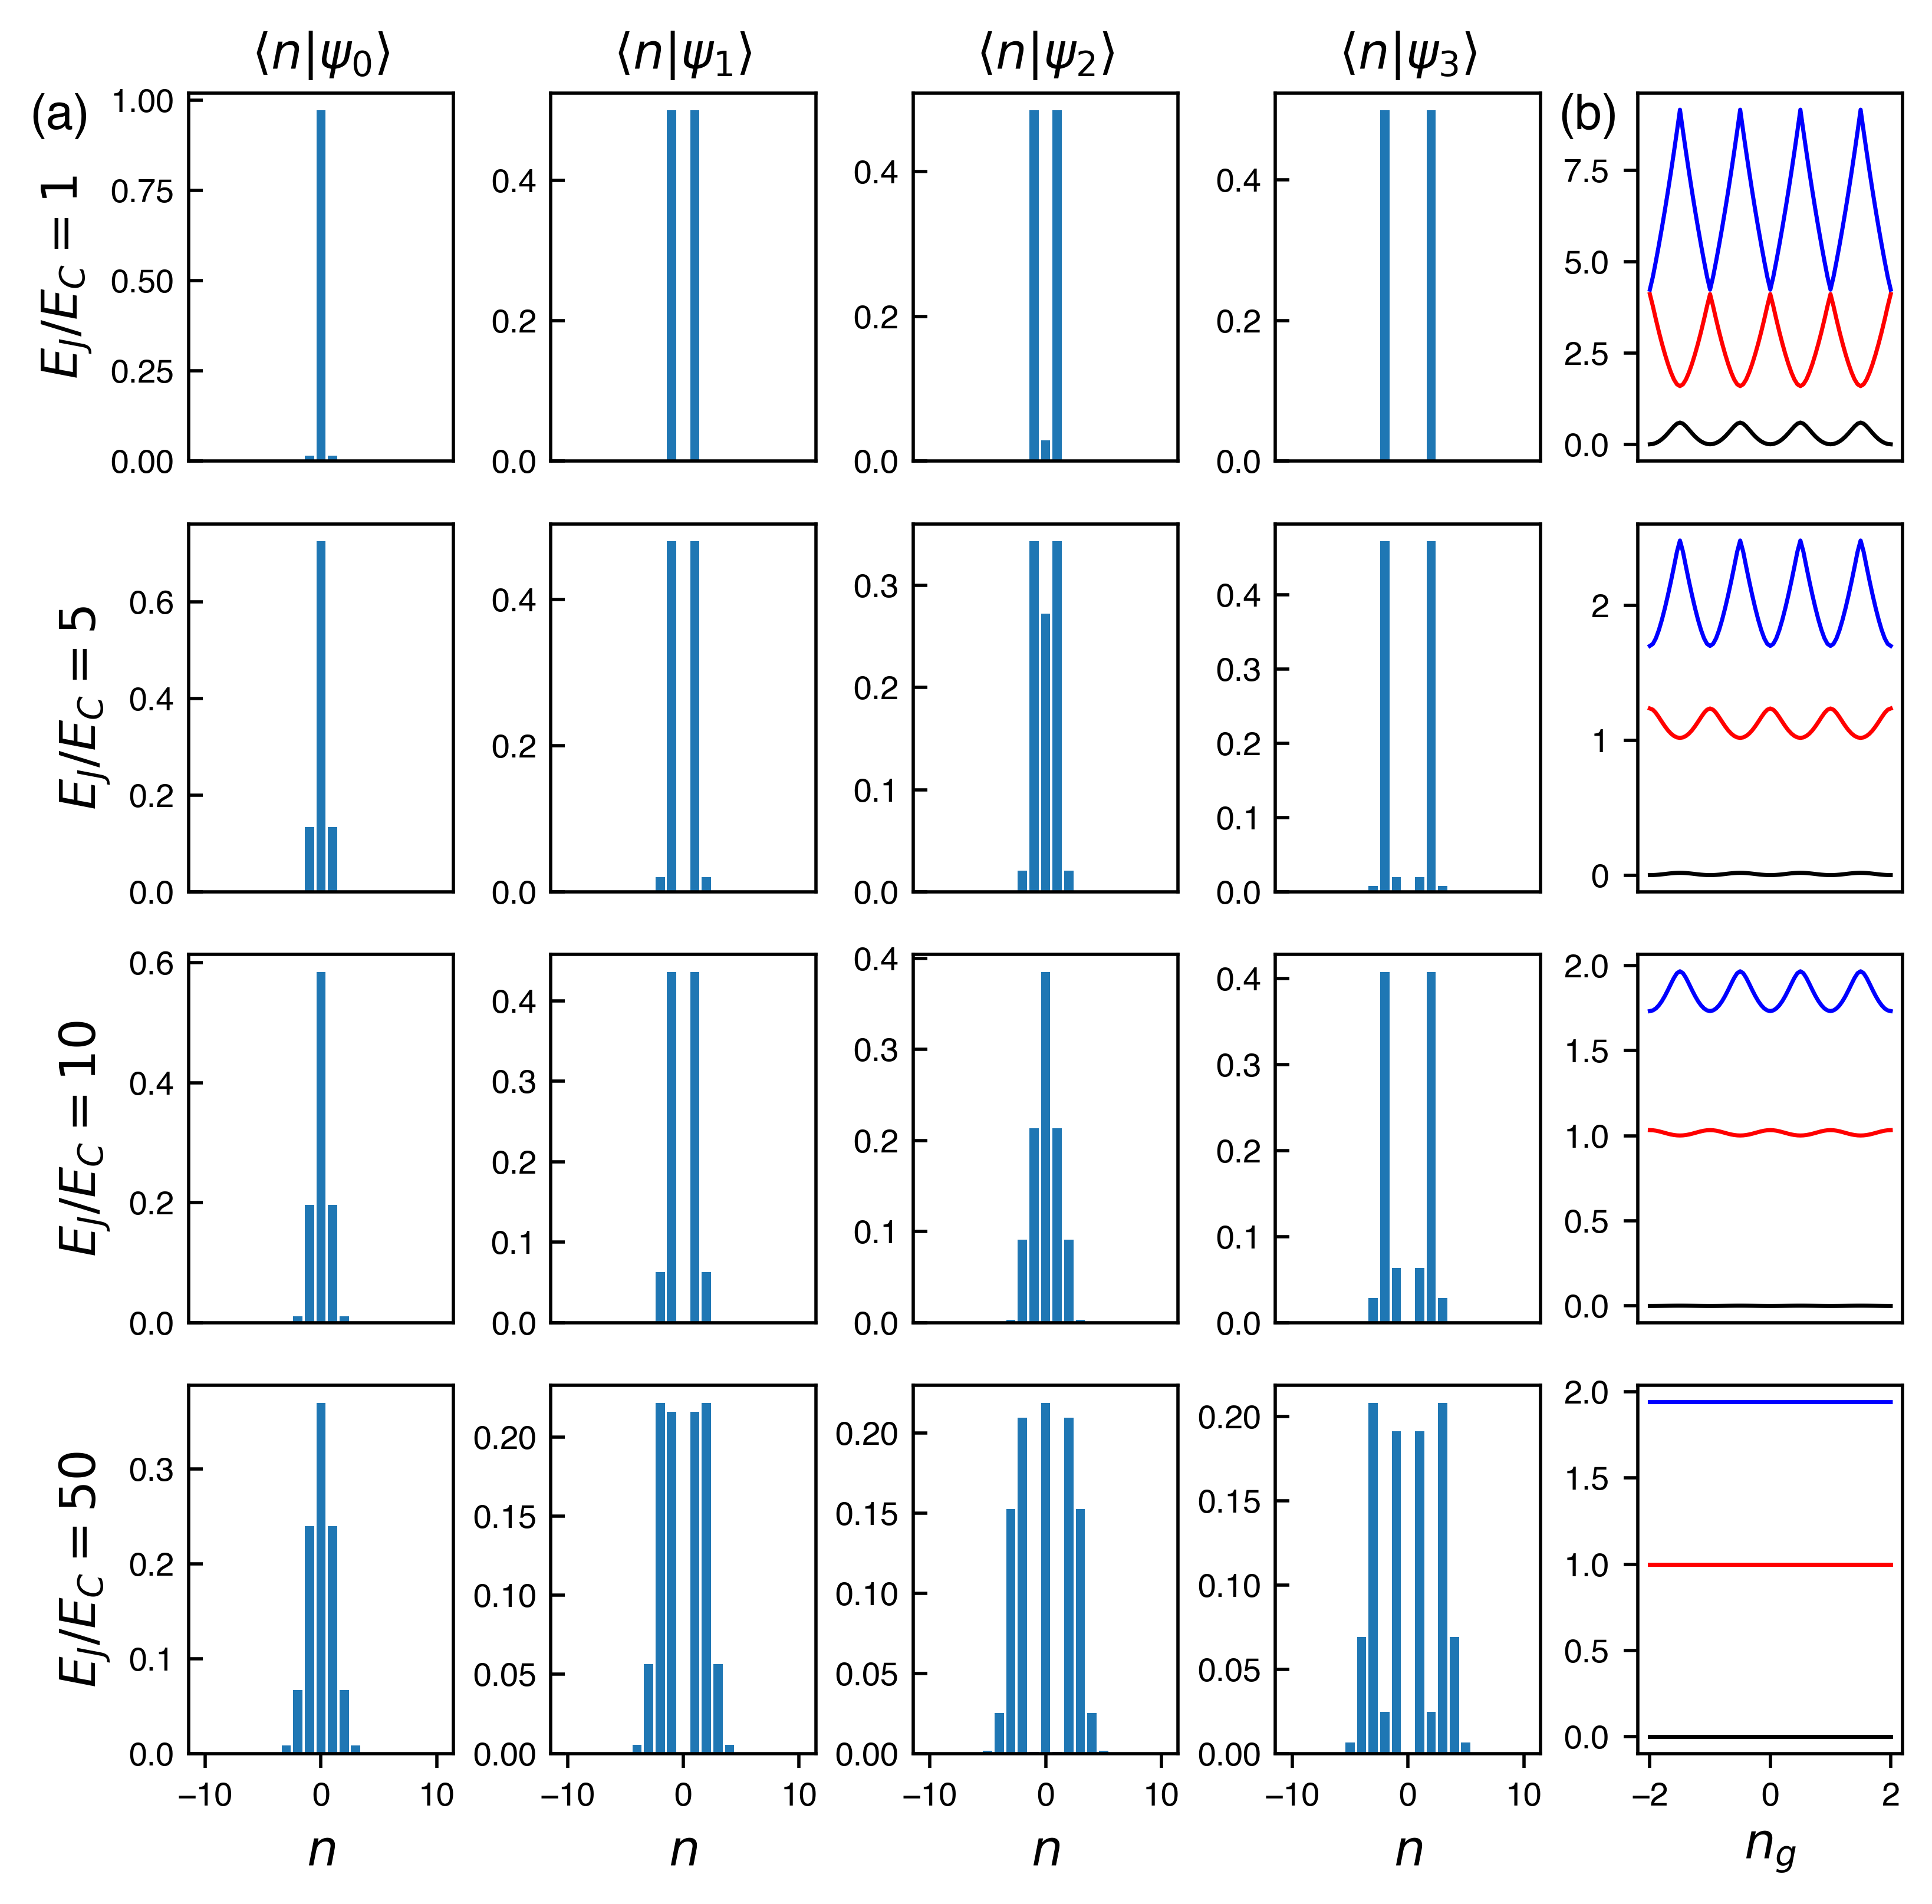

In [180]:
# Define the charge number operator Hamiltonian:
def nHat(nLevels):
    n = np.matrix(np.diag(np.arange(-nLevels, nLevels+1, 1)), dtype=complex)
    return n

def cosPhiHat(nLevels):
    cosPhi = np.matrix(np.diag(np.repeat(0.5, 2*nLevels), -1) + np.diag(np.repeat(0.5, 2*nLevels), -1).T, dtype=complex)
    return cosPhi

# Define the transmon Hamiltonian:
def hTransmon(EJ, EC, nG, nLevels):
    n = nHat(nLevels)
    cosPhi = cosPhiHat(nLevels)
    eye = np.matrix(np.diag(np.repeat(1, 1 + 2*nLevels)), dtype=complex)
    H = 4*EC*((n-(nG*eye))**2) - EJ*cosPhi
    return H

# Set the number of |n> states to be used in the simulation:
nLevels = 10 # Number of charge states considered (basis runs from -nLevels to nLevels)

# Set nG:
nG = 0 # Value used in this problem of the problem set.
n = nHat(nLevels)
nEigVals, nEigVecs = scipy.linalg.eigh(n)
ns = []
for nEigVal in nEigVals:
    ns.append(nEigVal)

EJ = 10e9 # Hz
EJoverECs = [1, 5, 10, 50]
nEnergies = 4 # Number of energy eigenstate wavefunctions to plot (the number of rows in the plot)

fig, axs = plt.subplots(len(EJoverECs), nEnergies+1, figsize=(6.5, 6.5), dpi=500, sharey=False)

for i, EJoverEC in enumerate(EJoverECs):
    # Instantiate the Hamiltonian:
    h = hTransmon(EJ, EJ/EJoverEC, nG, nLevels)

    # Diagonalize the charge number operator and the Hamiltonian:
    energyEigVals, energyEigVecs = scipy.linalg.eigh(h)

    amplitudes = {}
    for j in range(len(energyEigVals)):
        amplitudes[j] = []
        for k, nEigVal in enumerate(nEigVals):
            overlap = innerProduct(nEigVecs[k], energyEigVecs[:, j])
            amplitude = np.conjugate(overlap)*overlap
            amplitudes[j].append(amplitude)
    
    for j in range(nEnergies):
        ind = j # Current energy eigenstate index
        axs[i, j].bar(ns, amplitudes[ind])
        axs[i, j].tick_params(axis='y', direction='in')
        if j == 0: # Here we are at the left and need to add a y-label:
            axs[i, j].set_ylabel('$E_J/E_C = %d$' % EJoverEC, fontsize=12)
        if i == 0: # Here we are at the top and need to set the title:
            axs[i, j].set_title('$\langle n | \psi_%d \\rangle$' % ind, fontsize=12)
        if i == len(EJoverECs)-1:
            axs[i, j].set_xlabel('$n$', fontsize=12)
        else:
            axs[i,j].tick_params(axis='x', which='both', bottom=False, labelbottom=False)
                
ngMin = -2
ngMax = 2
ngStep = 0.05
ngs = np.arange(ngMin, ngMax+ngStep, ngStep)
colors = ['black', 'red', 'blue']
for i, EJoverEC in enumerate(EJoverECs):
    transitions = []
    for j in range(nEnergies-1):
        transitions.append([])
    
    energyEigVals, energyEigVecs = scipy.linalg.eigh(hTransmon(EJ, EJ/EJoverEC, 0.5, nLevels))
    norm = energyEigVals[1] - energyEigVals[0]
    energyEigVals, energyEigVecs = scipy.linalg.eigh(hTransmon(EJ, EJ/EJoverEC, 0, nLevels))
    offset = energyEigVals[0]
    for ng in ngs:
        energyEigVals, energyEigVecs = scipy.linalg.eigh(hTransmon(EJ, EJ/EJoverEC, ng, nLevels))
        for j in range(nEnergies-1):
            transitions[j].append( (energyEigVals[j] - offset) / norm )
    for j in range(nEnergies-1):
        axs[i, nEnergies].plot(ngs, transitions[j], linewidth='1', color=colors[j])
        if i == len(EJoverECs)-1:
            axs[i, nEnergies].set_xlabel('$n_g$', fontsize=12)
        else:
            axs[i,nEnergies].tick_params(axis='x', which='both', bottom=False, labelbottom=False)          

plt.tight_layout()

axs[0, 0].text(-0.6, 1.0, '(a)', transform=axs[0, 0].transAxes, fontsize=12, va='top', ha='left')
axs[0, 4].text(-0.3, 1.0, '(b)', transform=axs[0, 4].transAxes, fontsize=12, va='top', ha='left')

fig.savefig('fig2p6.pdf')

# Figure 2.7

This figure should show the transmon potential energy and eigenstates in the phi basis, similar to what was done for Figure 2.2

/Users/kevindcrowley/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/kevindcrowley/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/kevindcrowley/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/kevindcrowley/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/kevindcrowley/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to rea

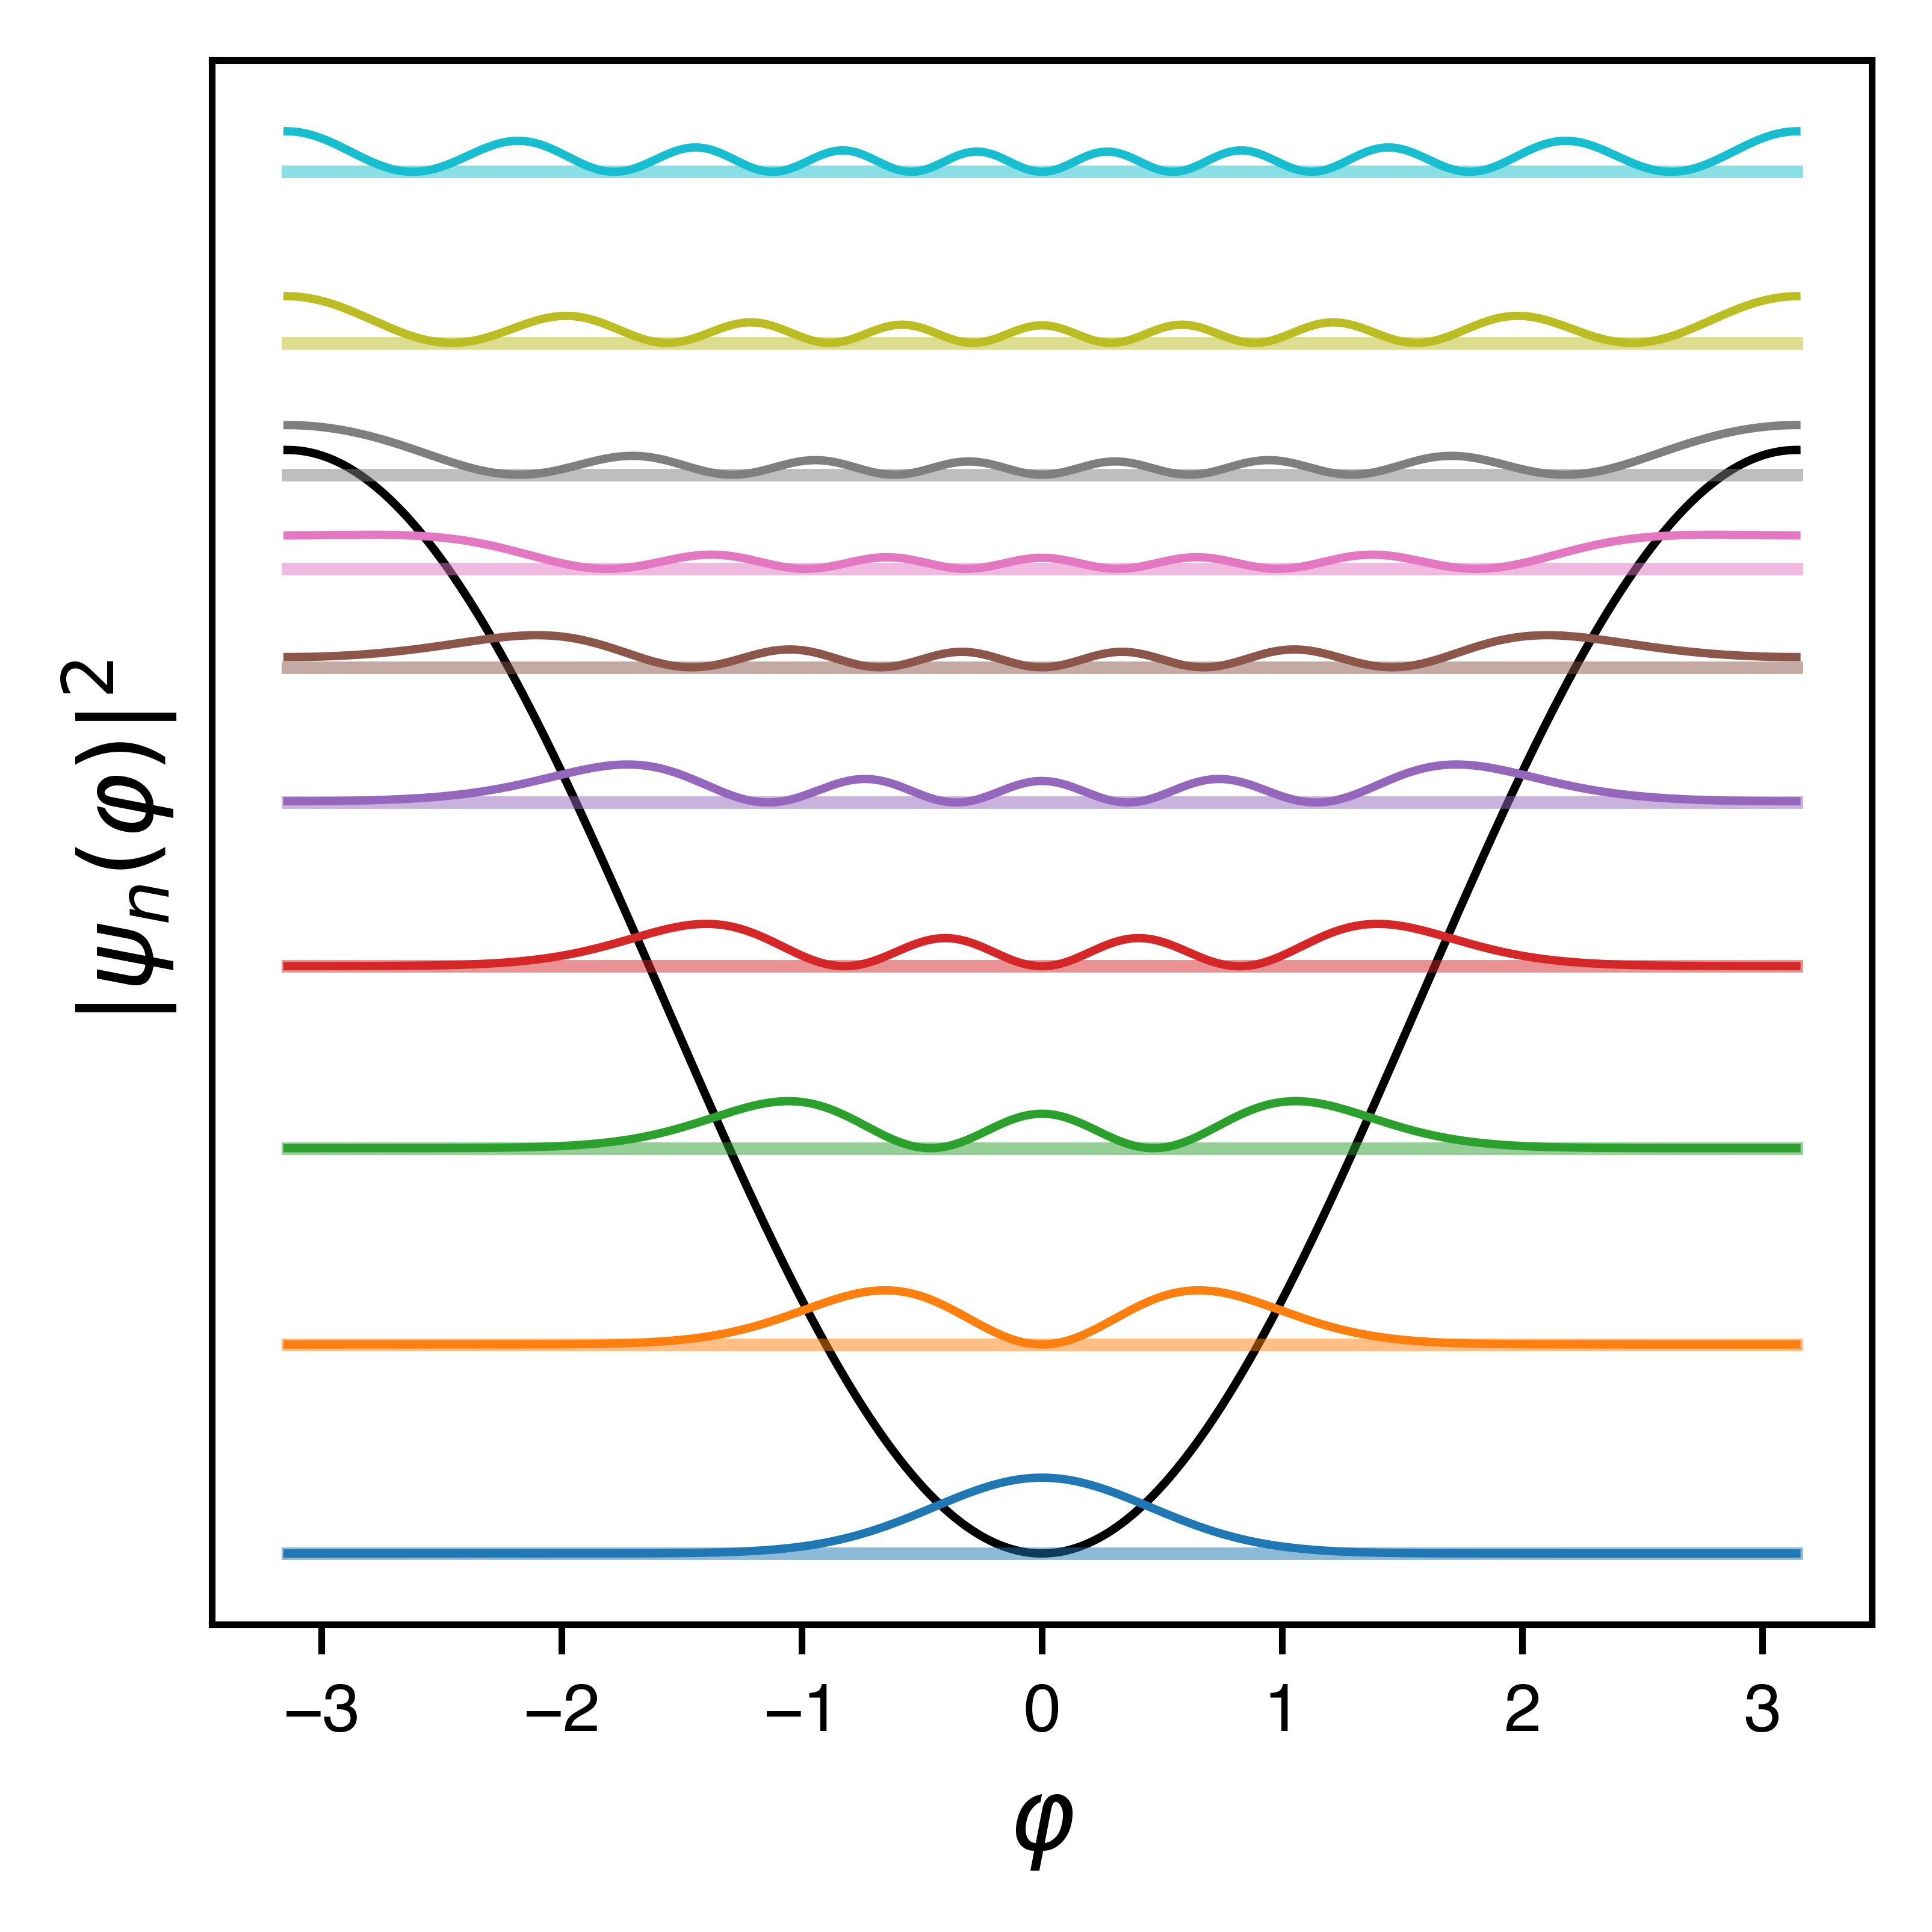

In [8]:
EJ = 10e9 # Hz
EC = 200e6 # Hz
ng = 0

Nphi = 1000 # Number of phi intervals
dphi = 2*np.pi/Nphi
phis = np.arange(-np.pi, np.pi + dphi, dphi)
phi = np.matrix(np.diag(phis), dtype=complex)
cosPhi = np.matrix(np.diag(np.cos(phis)), dtype=complex)
n = -(1j/(2*dphi))*np.matrix(np.diag(np.repeat(-1, Nphi), -1) + np.diag(np.repeat(1, Nphi), -1).T, dtype=complex)
n.itemset((0, Nphi), 1j/(2*dphi))
n.itemset((Nphi, 0), -1j/(2*dphi))
eye = np.matrix(np.diag(np.repeat(1, Nphi+1)), dtype=complex)
h = 4*EC*((n-(ng*eye))**2) - EJ*cosPhi

energyEigVals, energyEigVecs = scipy.linalg.eigh(h)

fig, ax = plt.subplots(figsize=(3.25, 3.25), dpi=1000)

# level = 1
# ax.plot(phis, energyEigVecs[:, level]*np.conj(energyEigVecs[:, level]))

normV = 25
normOff = 25
ax.plot(phis, (1-np.cos(phis))/normV, color='black', label='$V(\phi)$', linewidth=1)
levels = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
for level in levels:
    colorInd = int(level/2)
    ax.plot(phis, energyEigVecs[:, level]*np.conj(energyEigVecs[:, level]) + ((energyEigVals[level] - energyEigVals[0])/(EJ*normOff)),
           linewidth=1, color='C' + str(colorInd))
    ax.plot(phis, np.full(len(phis), ((energyEigVals[level] - energyEigVals[0])/(EL*normOff))), color='C' + str(colorInd), alpha=0.5)
ax.set_xlabel('$\\varphi$', fontsize=12)
# ax.set_ylabel('$|\langle \\varphi | \psi_n \\rangle|^2 + (E_n - E_0)$', fontsize=12)
ax.set_ylabel('$| \\psi_n (\\varphi) |^2$', fontsize=12) # Changed after comment from Andrew
ax.tick_params(axis='y', which='both', left=False, labelleft=False)
plt.tight_layout()
fig.savefig('fig2p7.pdf')

# Figure 2.8

This figure should show the circuit diagram for the tunable transmon. Make sure to make the labeling of the circuit consistent with the notation used in the text. 

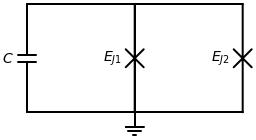

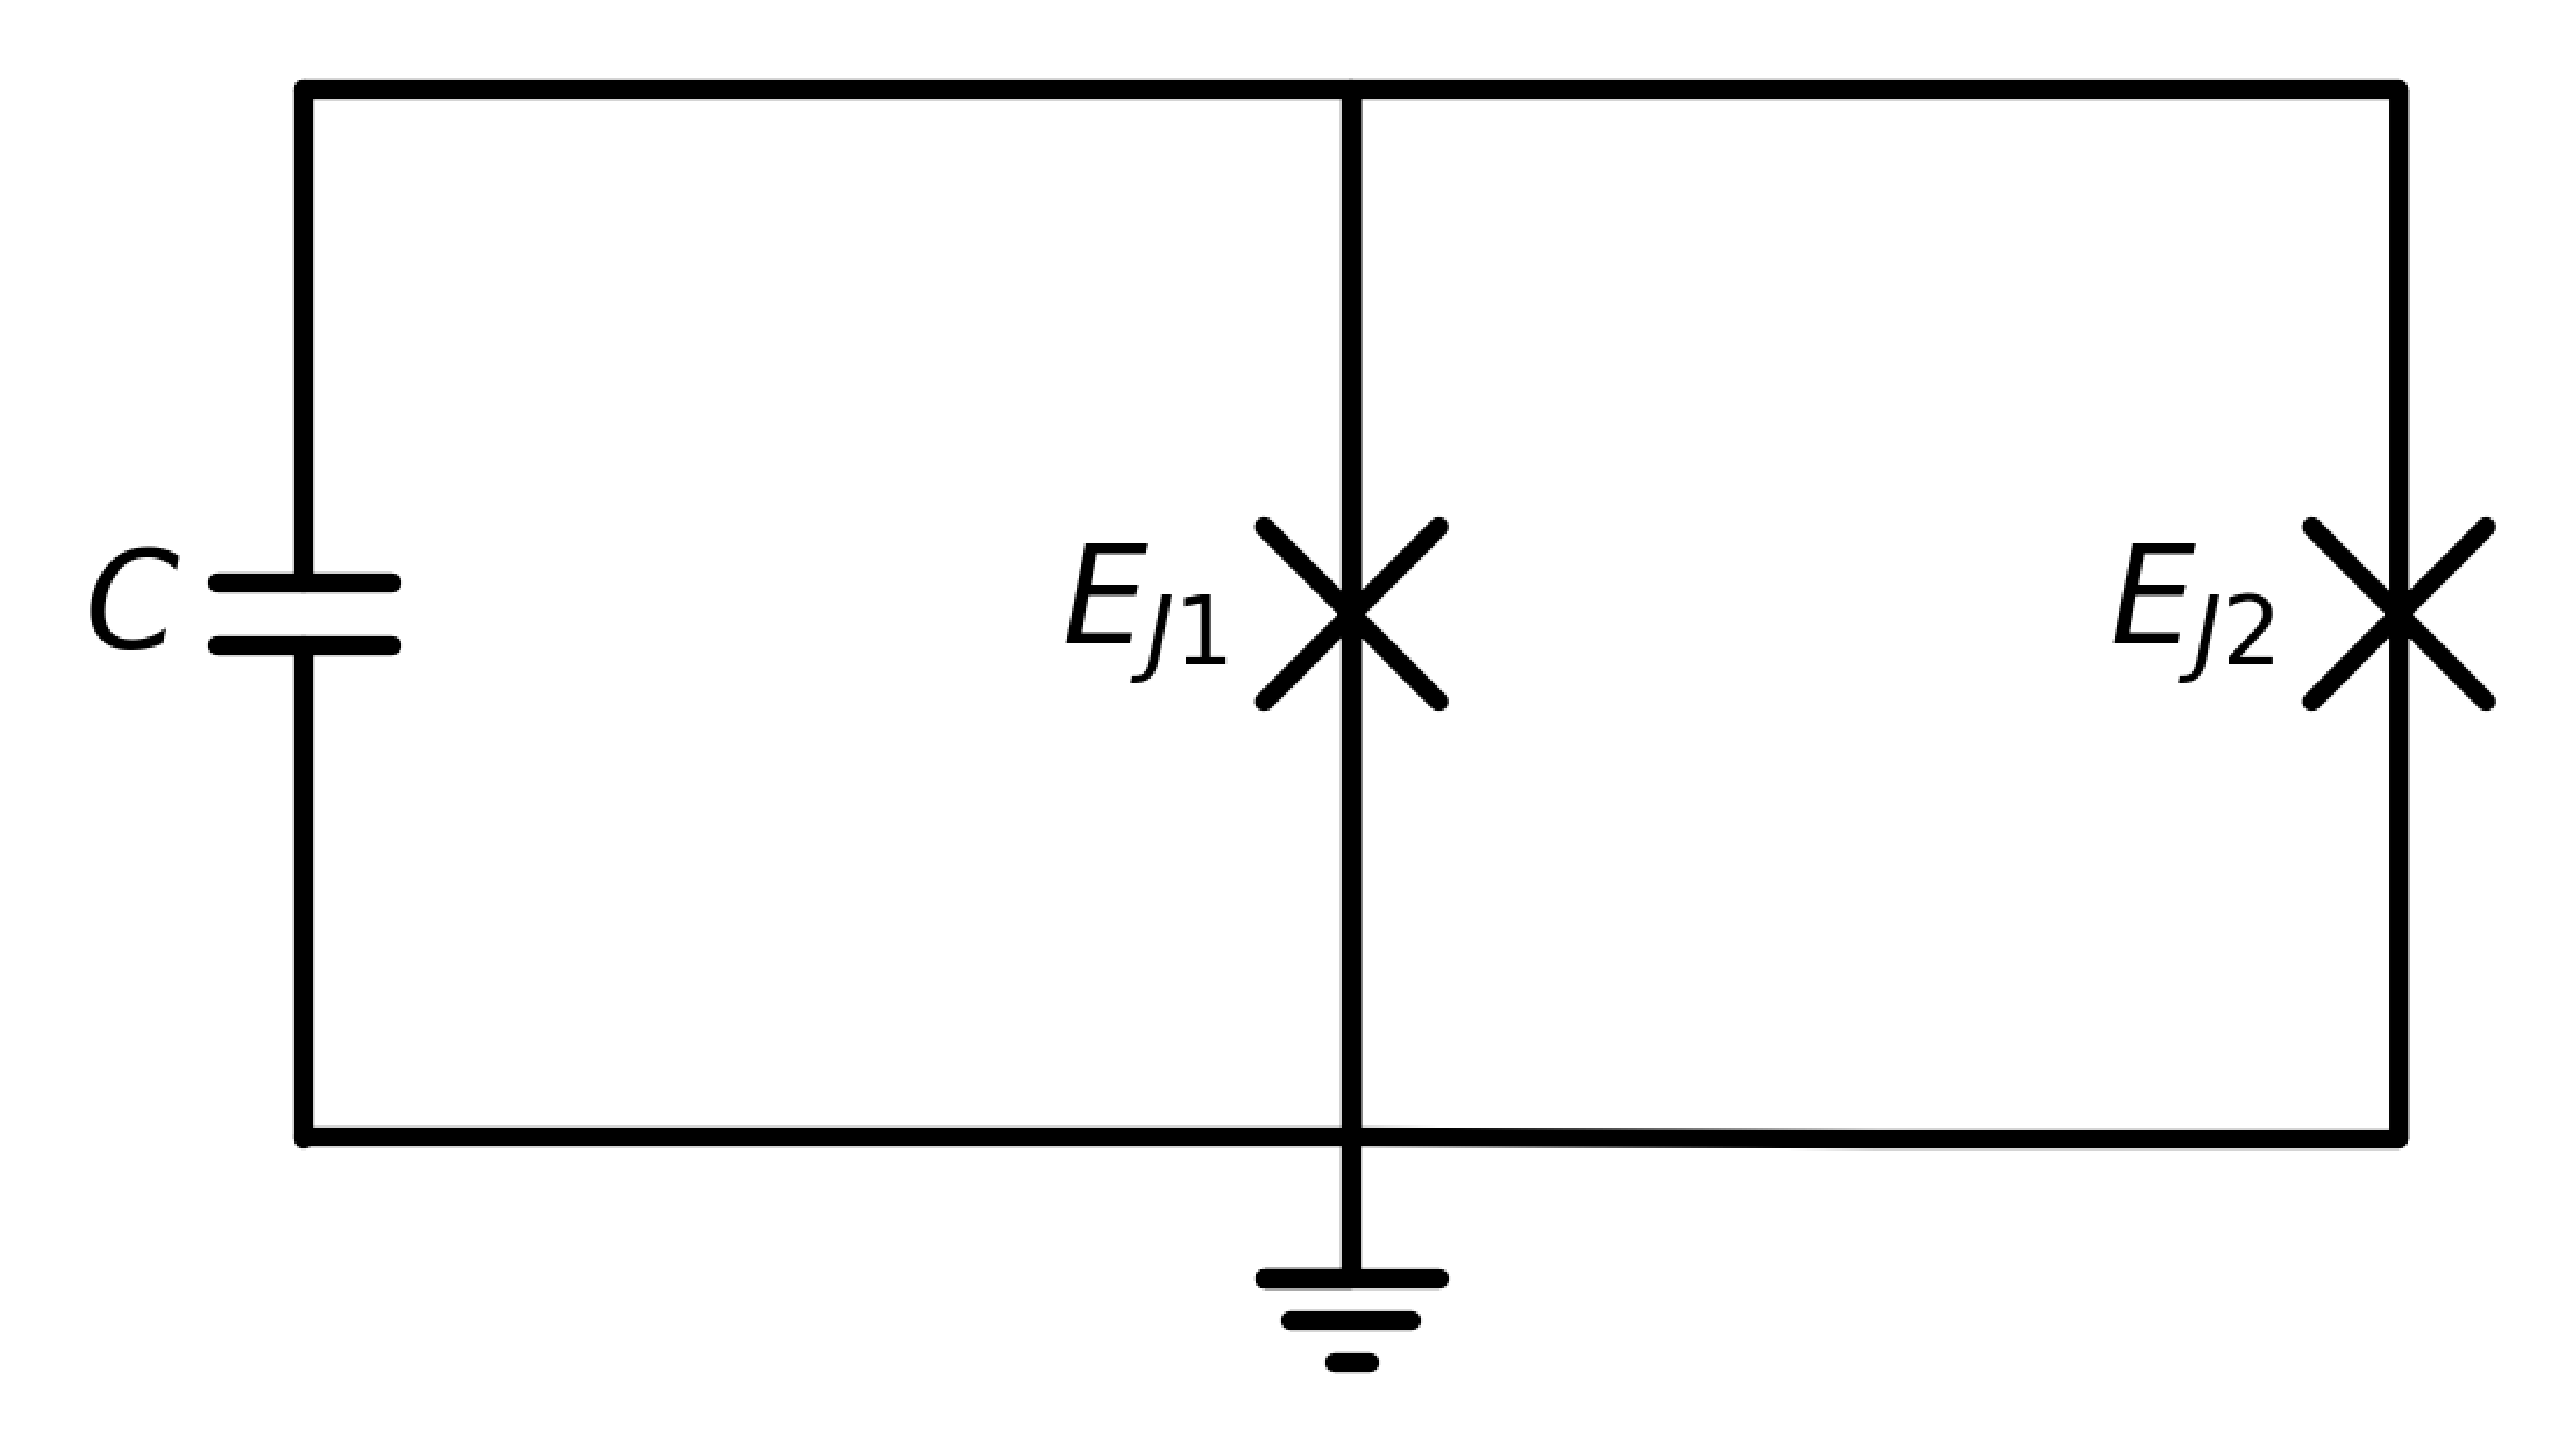

In [18]:
fig, ax = plt.subplots(figsize=(6.5, 3.25), dpi=1000)

## Subfigure (a):
with schemdraw.Drawing() as d:
    d += elm.Capacitor().up().label("$C$")
    d += elm.Line().right()
    d += elm.Josephson().down().label("$E_{J1}$")
    d += elm.Ground()
    d += elm.Line().up()
    d += elm.Line().right()
    d += elm.Josephson().down().label("$E_{J2}$")
    d += elm.Line().left()
    d += elm.Line().left()
    d.save("tunableTransmon.png", dpi=300)  # Change dpi to your desired resolution

# Load the saved image and integrate it into a matplotlib figure
img = Image.open('tunableTransmon.png')

ax.imshow(img)
ax.axis('off')  # Hide axes for a clean look
plt.tight_layout()
plt.savefig('fig2p8.pdf')

# Figure 2.9

This figure should show the flux dispersion of the tunable transmon. The left panel should show the symmetric case, and the right panel should show the asymmetric case at a range of values (illustrating how asymmetry affects the tradeoff between tunability and flux noise sensitivity).

/var/folders/m8/gbh7nps52zzfb187_b37kb540000gn/T/ipykernel_64324/2094128170.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_yticklabels(axs[0].get_yticks(), fontsize=12)
/var/folders/m8/gbh7nps52zzfb187_b37kb540000gn/T/ipykernel_64324/2094128170.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_yticklabels(axs[1].get_yticks(), fontsize=12)


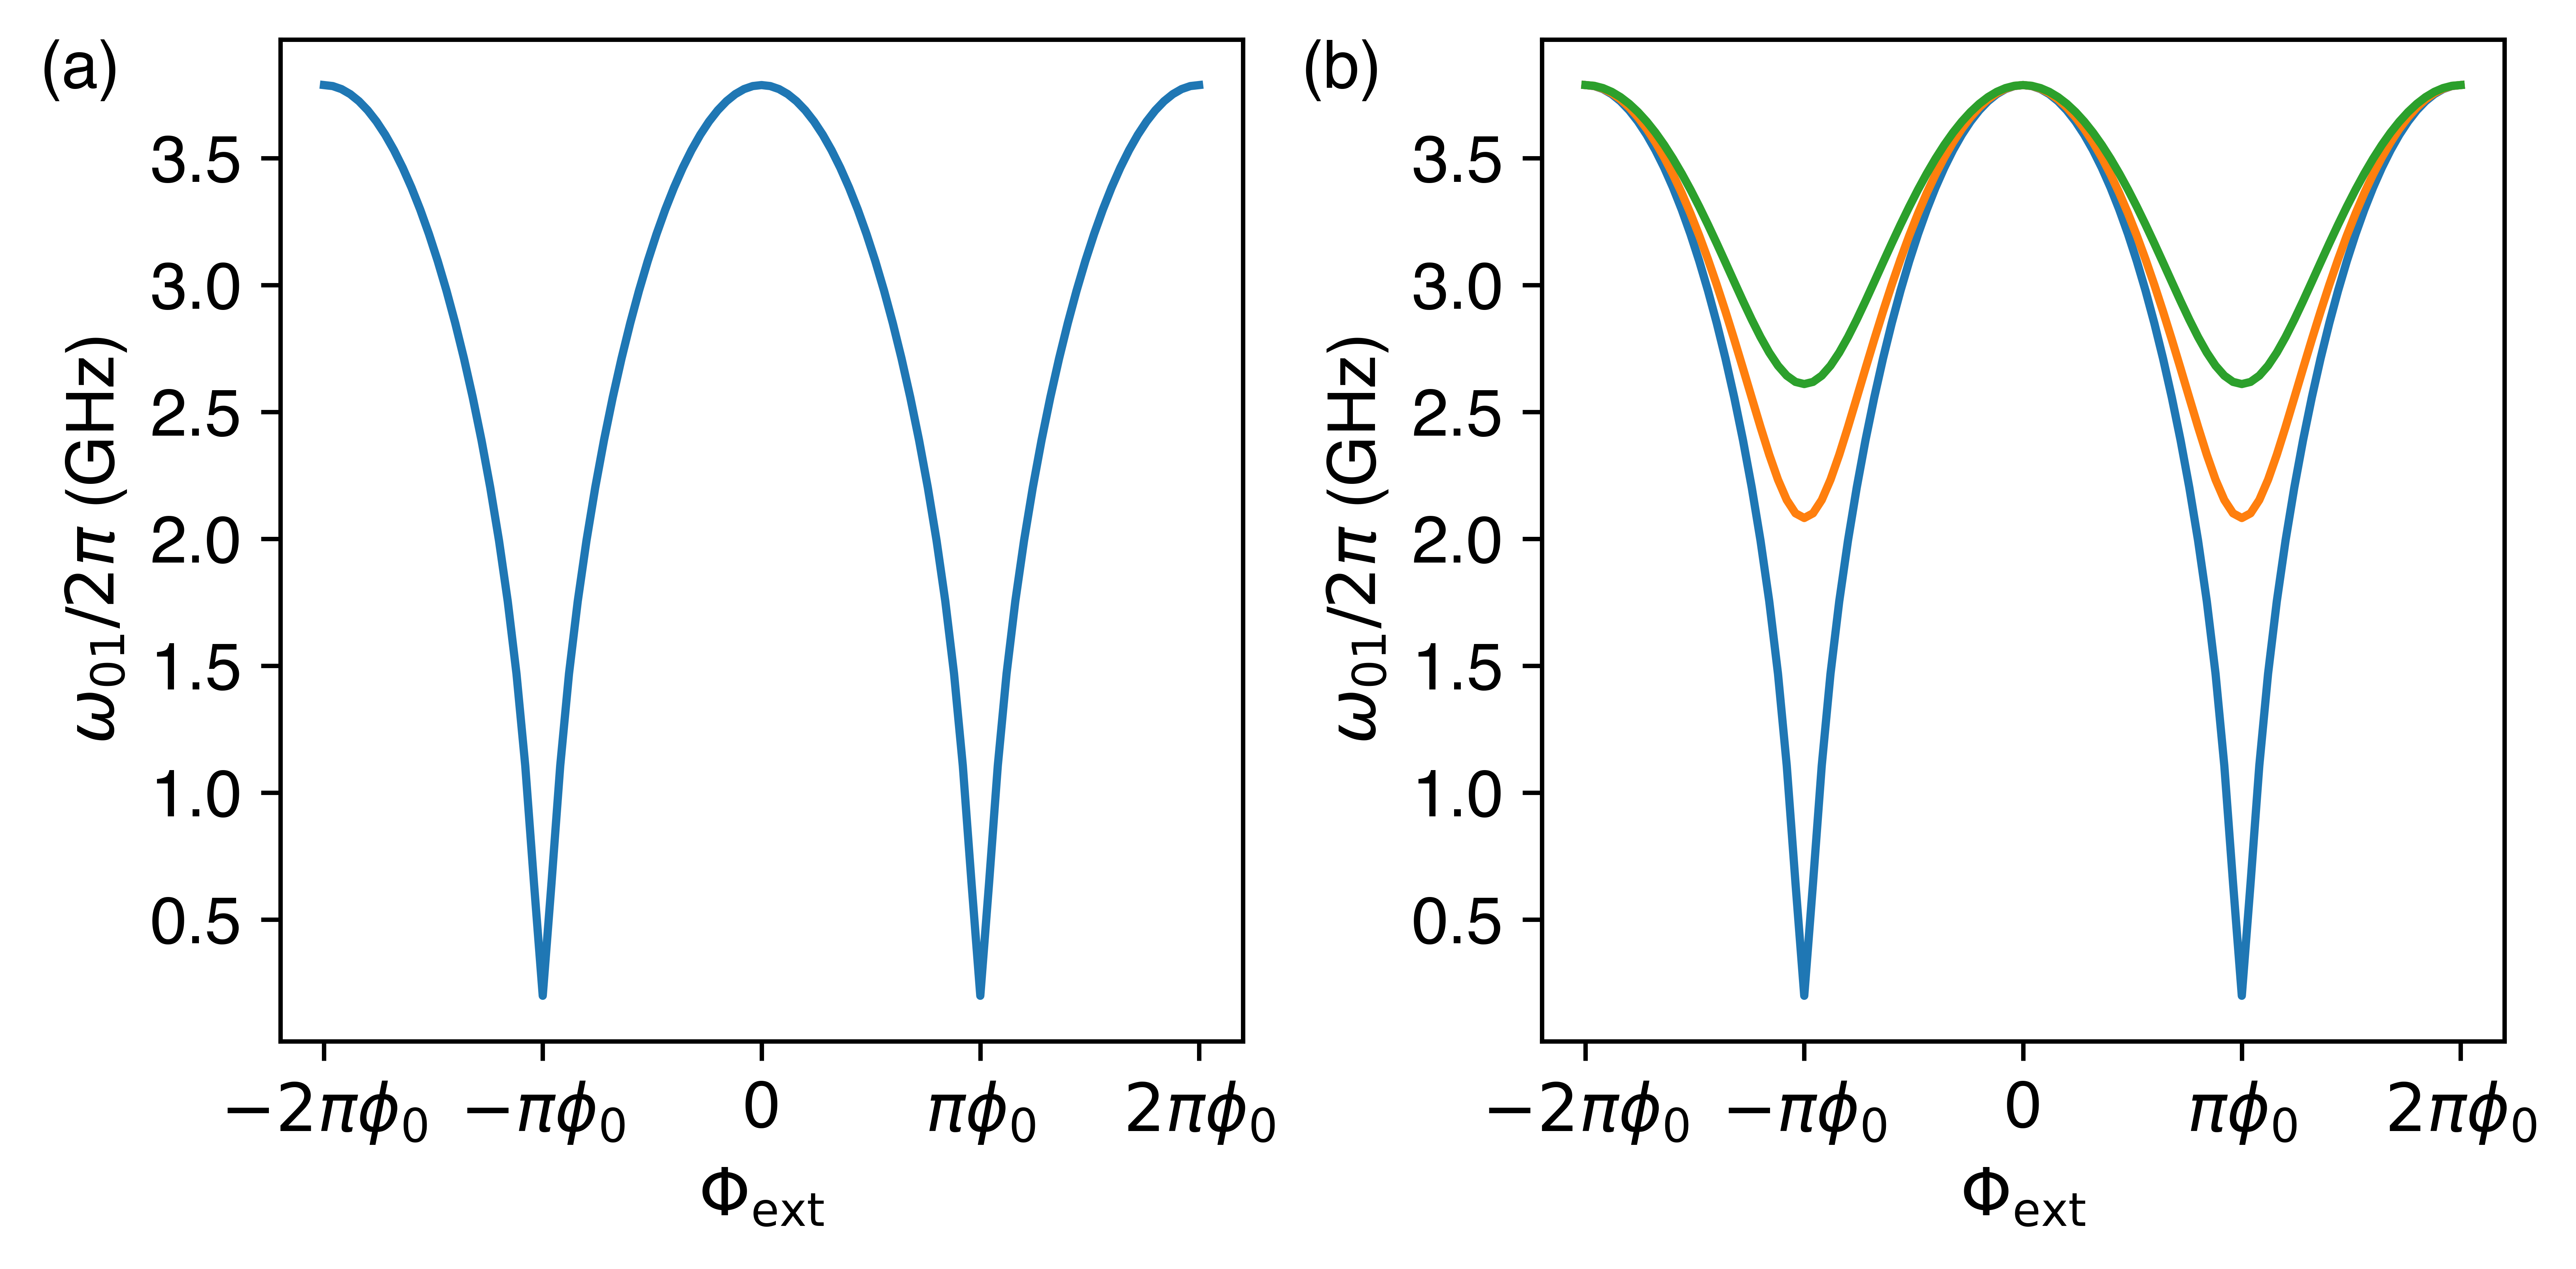

In [40]:
EJ = 5e9 # Hz
EC = 200e6 # Hz
ng = 0

def ejTunable(EJ1, gamma, phiExt):
    d = (EJ1 - gamma*EJ1) / (EJ1 + gamma*EJ1)
    return (EJ1 + gamma*EJ1) * np.abs(np.cos(phiExt/2)) * np.sqrt(1 + (d*np.tan(phiExt/2))**2)

Nphi = 1000 # Number of phi intervals
dphi = 2*np.pi/Nphi
phis = np.arange(-np.pi, np.pi + dphi, dphi)
phi = np.matrix(np.diag(phis), dtype=complex)
cosPhi = np.matrix(np.diag(np.cos(phis)), dtype=complex)
n = -(1j/(2*dphi))*np.matrix(np.diag(np.repeat(-1, Nphi), -1) + np.diag(np.repeat(1, Nphi), -1).T, dtype=complex)
n.itemset((0, Nphi), 1j/(2*dphi))
n.itemset((Nphi, 0), -1j/(2*dphi))
eye = np.matrix(np.diag(np.repeat(1, Nphi+1)), dtype=complex)

fig, axs = plt.subplots(1, 2, figsize=(6.5, 3.25), dpi=1000)

## Subfigure (a)
numFluxes = 101
phiExts = np.linspace(-2*np.pi, 2*np.pi, num=numFluxes)
transitions = np.zeros(numFluxes)
gamma = 1

for i, phiExt in enumerate(phiExts):
    h = 4*EC*((n-(ng*eye))**2) - ejTunable(EJ, gamma, phiExt)*cosPhi
    energyEigVals, energyEigVecs = scipy.linalg.eigh(h)
    transition = energyEigVals[2] - energyEigVals[0]
    transitions[i] = transition
    
axs[0].plot(phiExts, transitions/1e9)
axs[0].set_ylabel('$\omega_{01} / 2 \pi$ (GHz)', fontsize=12)
axs[0].set_xlabel('$\Phi_{\mathrm{ext}}$', fontsize=12)
x_ticks = [-2*np.pi, -np.pi, 0, np.pi, 2*np.pi]
x_labels = ['$-2 \pi \phi_0$', '$-\pi \phi_0$', '0', '$\pi \phi_0$', '$2 \pi \phi_0$']
axs[0].set_xticks(x_ticks)
axs[0].set_xticklabels(x_labels, fontsize=12)
axs[0].set_yticklabels(axs[0].get_yticks(), fontsize=12)

for gamma in [1, 2, 3]:
    transitions = np.zeros(numFluxes)
    EJ1 = (2 / (1 + gamma))*EJ

    for i, phiExt in enumerate(phiExts):
        h = 4*EC*((n-(ng*eye))**2) - ejTunable(EJ1, gamma, phiExt)*cosPhi
        energyEigVals, energyEigVecs = scipy.linalg.eigh(h)
        transition = energyEigVals[2] - energyEigVals[0]
        transitions[i] = transition
    
    axs[1].plot(phiExts, transitions/1e9)
        
axs[1].set_ylabel('$\omega_{01} / 2 \pi$ (GHz)', fontsize=12)
axs[1].set_xlabel('$\Phi_{\mathrm{ext}}$', fontsize=12)
x_ticks = [-2*np.pi, -np.pi, 0, np.pi, 2*np.pi]
x_labels = ['$-2 \pi \phi_0$', '$-\pi \phi_0$', '0', '$\pi \phi_0$', '$2 \pi \phi_0$']
axs[1].set_xticks(x_ticks)
axs[1].set_xticklabels(x_labels, fontsize=12)
axs[1].set_yticklabels(axs[1].get_yticks(), fontsize=12)

plt.tight_layout()

axs[0].text(-0.25, 1.0, '(a)', transform=axs[0].transAxes, fontsize=12, va='top', ha='left')
axs[1].text(-0.25, 1.0, '(b)', transform=axs[1].transAxes, fontsize=12, va='top', ha='left')

plt.savefig('fig2p9.pdf')

# Figure 2.10

This figure should show the circuit diagram of a driven LC resonator. The left panel should show the circuit with the voltage source's load resistor, and the right panel should show the circuit without the load resistor. Make sure to make the labeling of the circuit consistent with the notation used in the text.

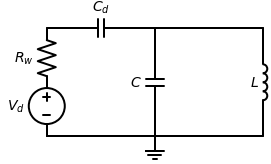

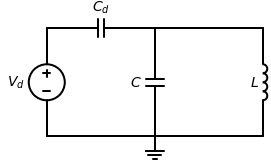

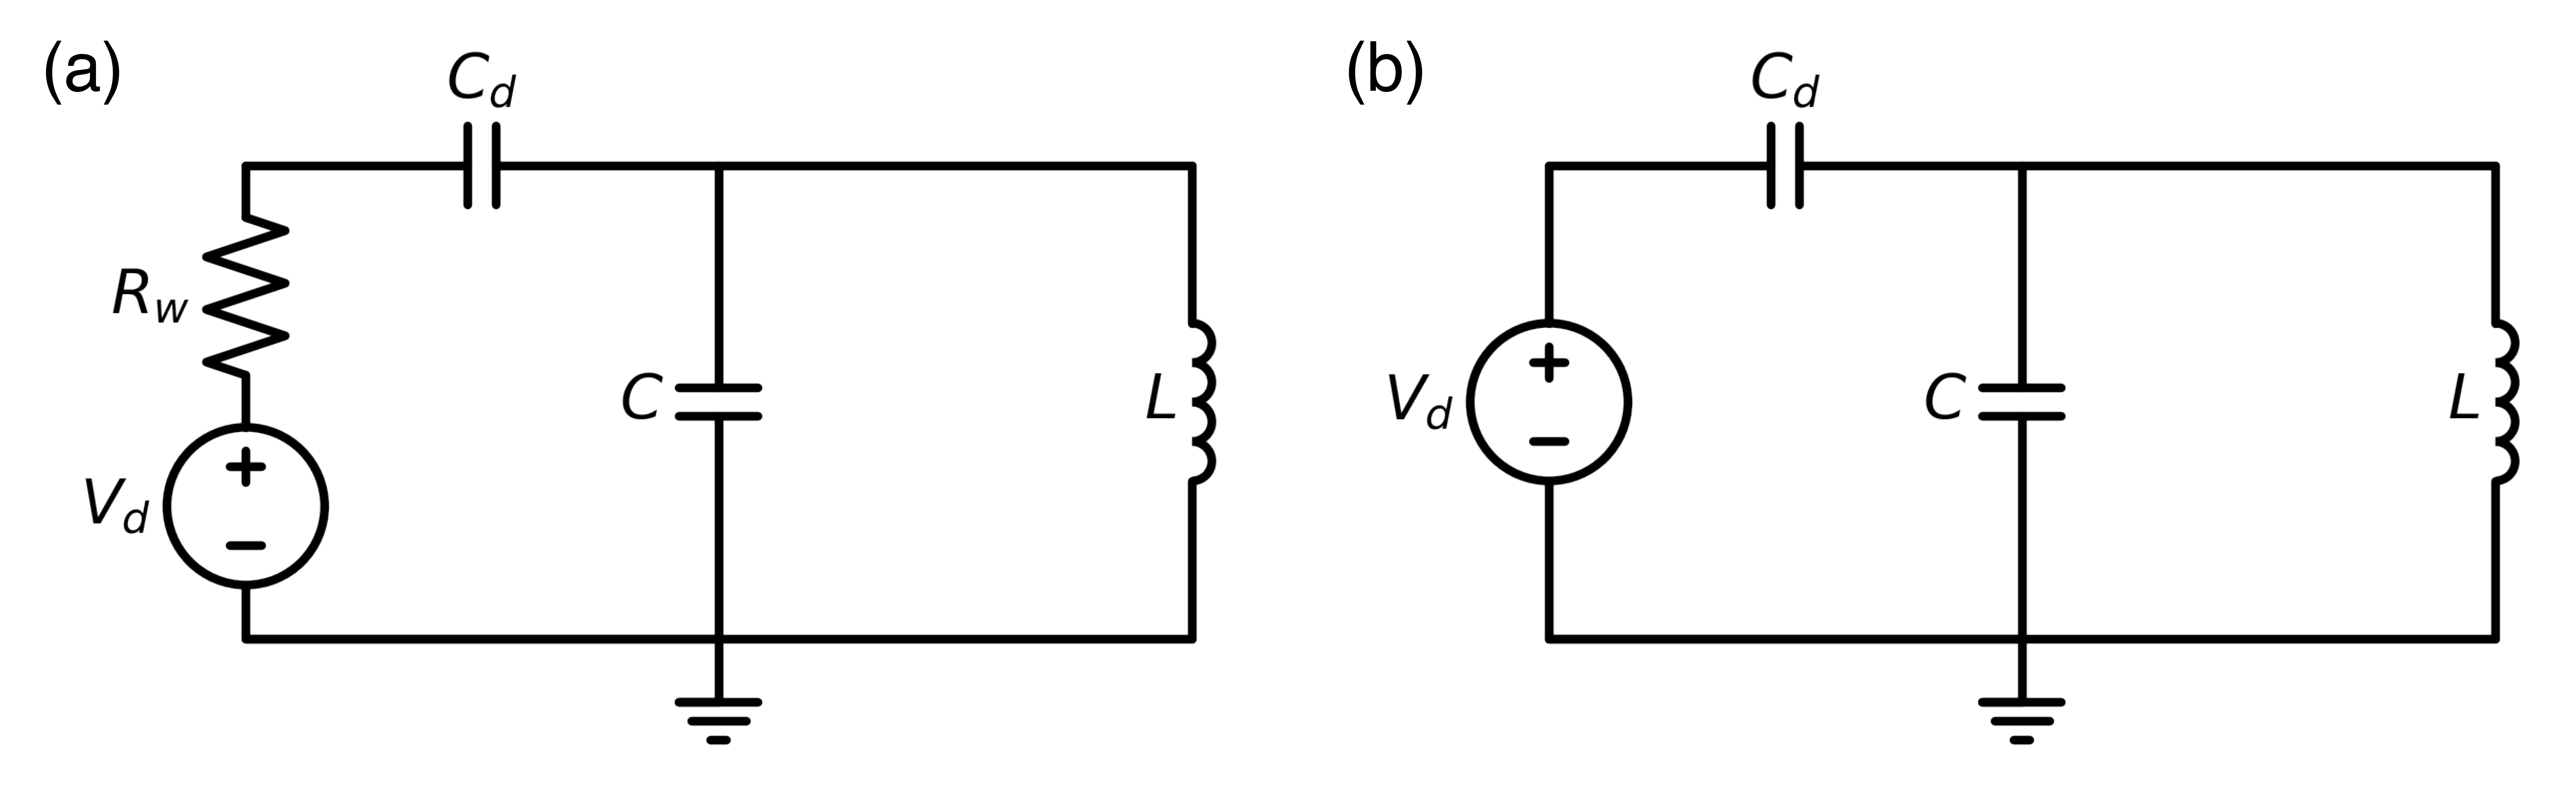

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(6.5, 2), dpi=1000)

## Subfigure (a):
with schemdraw.Drawing() as d:
    d += elm.Line().up().length(0.33)  # Gap element to create spacing
    d += elm.SourceV().length(0.35).label("$V_d$")
    d += elm.Line().length(0.33)  # Gap element to create spacing
    d += elm.Resistor().length(0.35).label("$R_w$")
    d += elm.Line().length(0.33)  # Gap element to create spacing
    d += elm.Capacitor().right().label('$C_d$')
    d += elm.Line().right()
    d += elm.Inductor().down().label('$L$')
    d += elm.Line().left()
    d += elm.Line().left()
    d += elm.Line().right()
    d += elm.Ground()
    d += elm.Capacitor().up().label('$C$')
    d.save("drivenTransmonA.png", dpi=300)  # Change dpi to your desired resolution

# Load the saved image and integrate it into a matplotlib figure
img = Image.open('drivenTransmonA.png')

axs[0].imshow(img)
axs[0].axis('off')  # Hide axes for a clean look

## Subfigure (b):
with schemdraw.Drawing() as d:
    d += elm.SourceV().up().label("$V_d$")
    d += elm.Capacitor().right().label('$C_d$')
    d += elm.Line().right()
    d += elm.Inductor().down().label('$L$')
    d += elm.Line().left()
    d += elm.Line().left()
    d += elm.Line().right()
    d += elm.Ground()
    d += elm.Capacitor().up().label('$C$')
    d.save("drivenTransmonB.png", dpi=300)  # Change dpi to your desired resolution

# Load the saved image and integrate it into a matplotlib figure
img = Image.open('drivenTransmonB.png')

axs[1].imshow(img)
axs[1].axis('off')  # Hide axes for a clean look

plt.tight_layout()

axs[0].text(0, 1.0, '(a)', transform=axs[0].transAxes, fontsize=12, va='top', ha='left')
axs[1].text(0, 1.0, '(b)', transform=axs[1].transAxes, fontsize=12, va='top', ha='left')

plt.savefig('fig2p10.pdf')

# Figure 2.11

This figure should illustrate Rabi oscillations. The left panel should be a simulated Rabi chevron, and the right panel should be a measured one.

/var/folders/m8/gbh7nps52zzfb187_b37kb540000gn/T/ipykernel_64324/2231540476.py:32: ComplexWarning: Casting complex values to real discards the imaginary part
  amplitudes[i, j] = currentState[1][0]*np.conj(currentState[1][0])


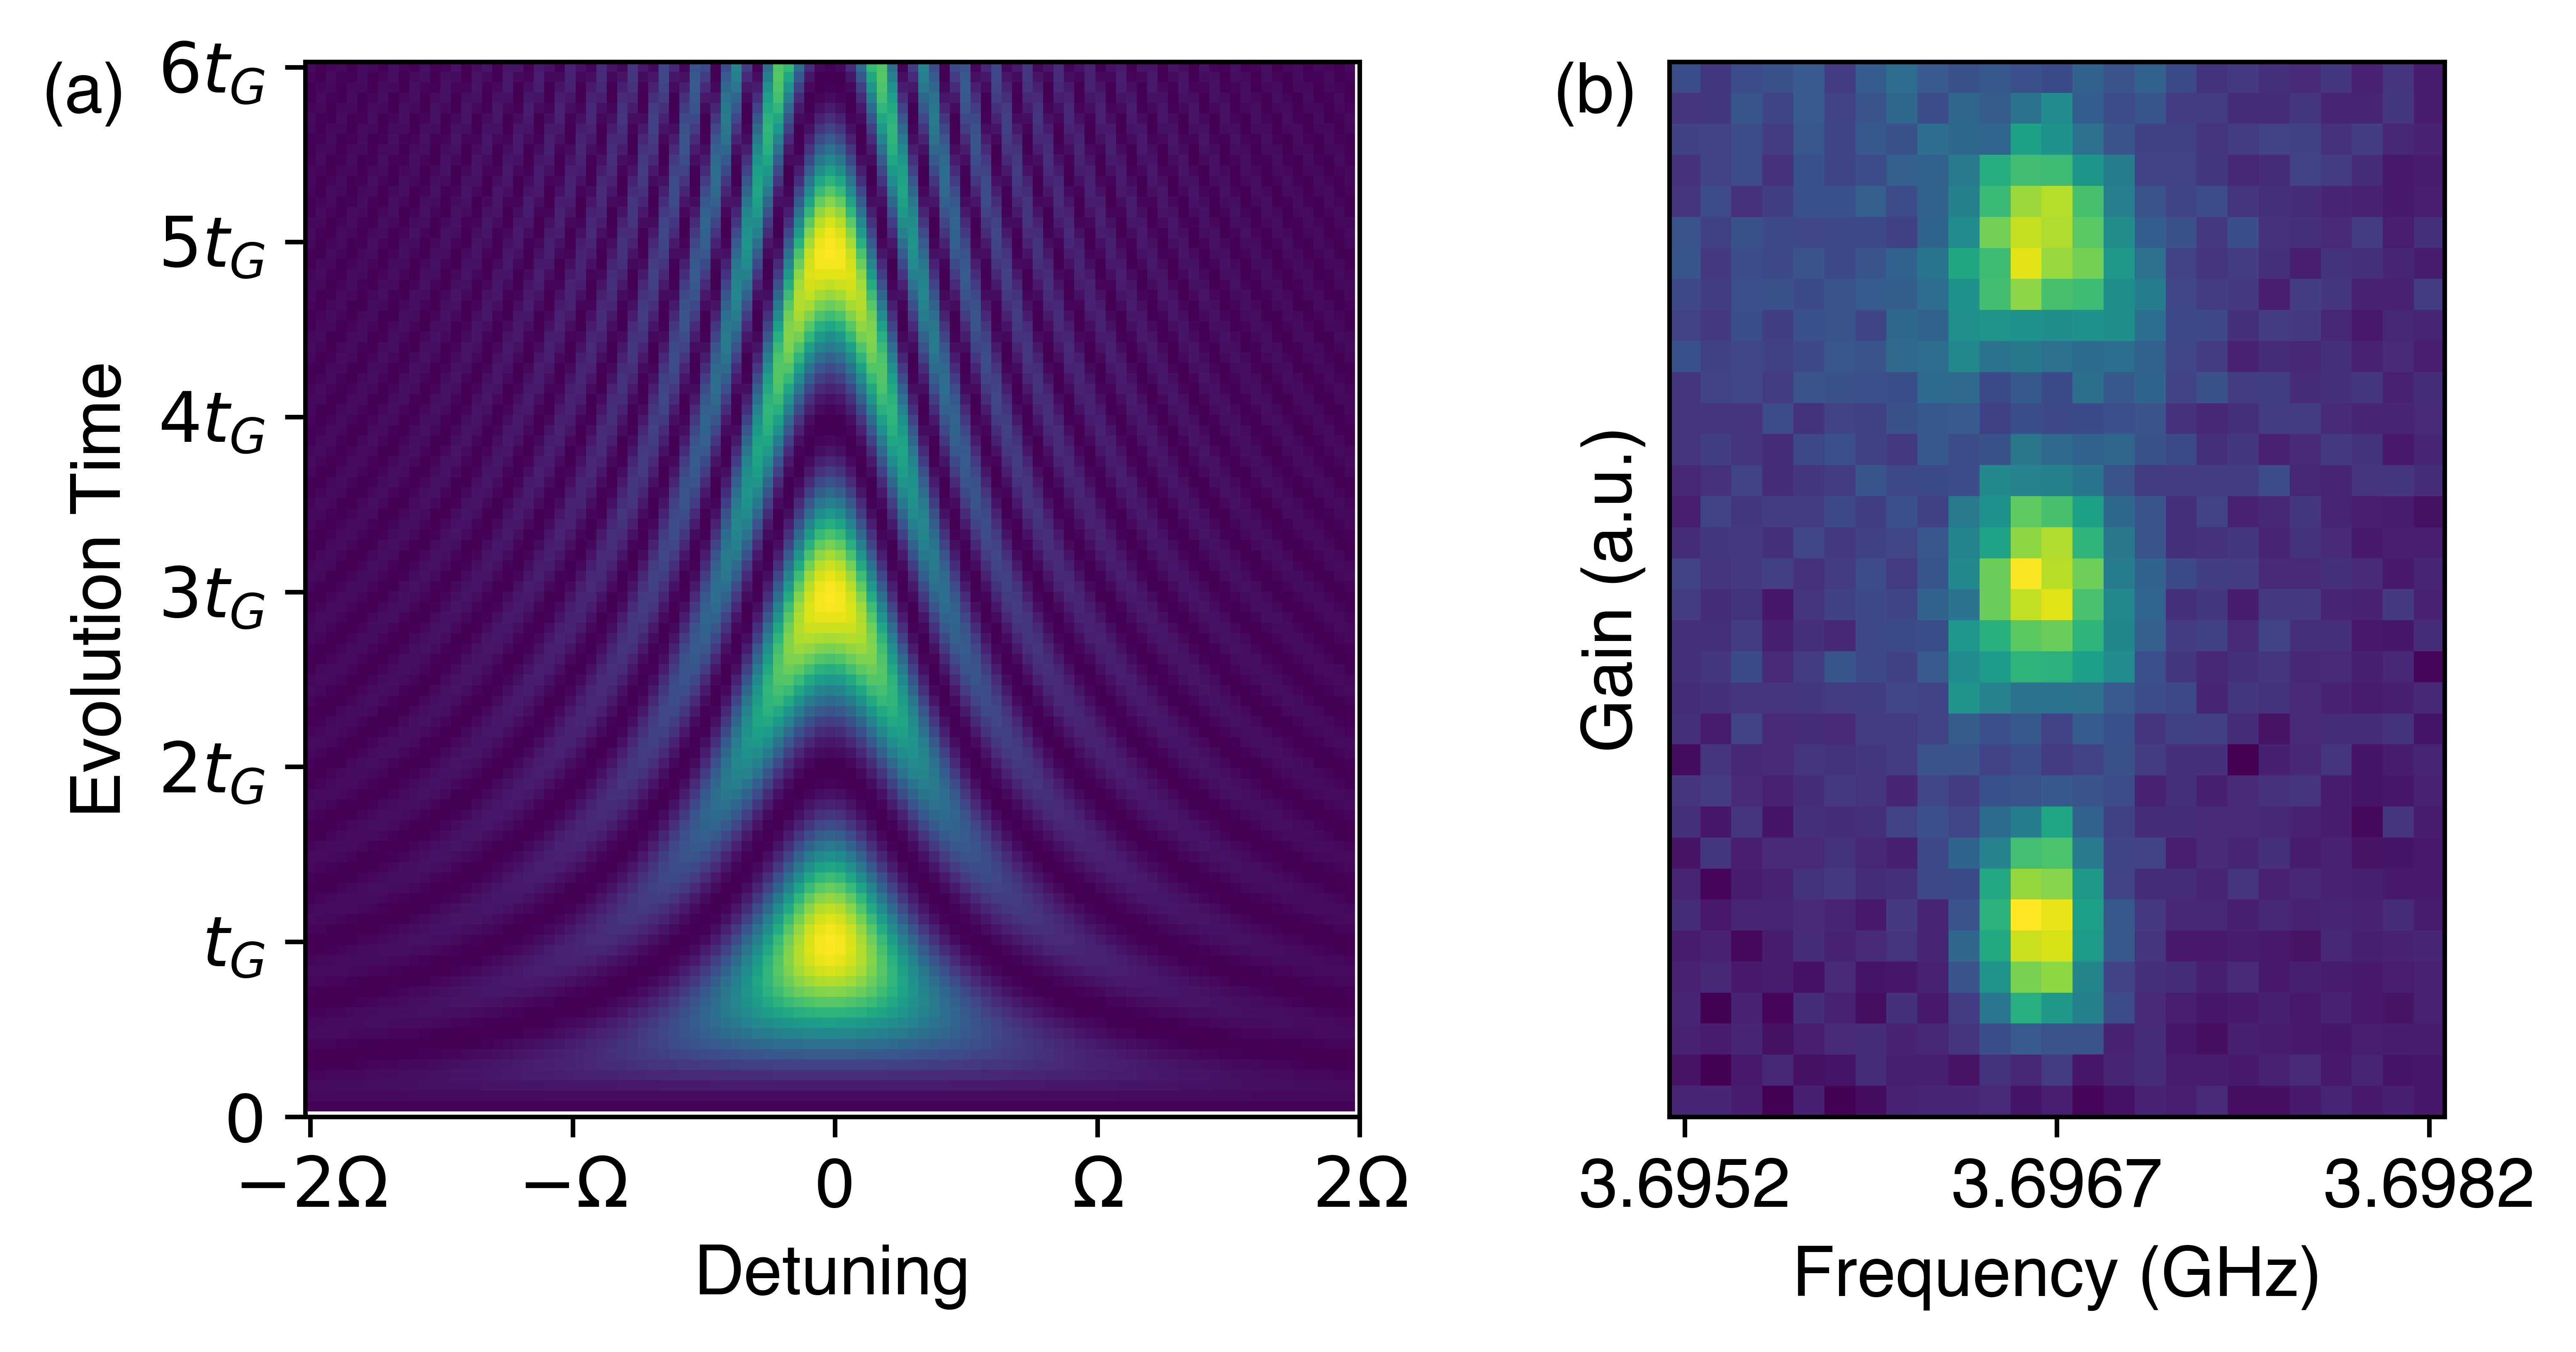

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(6.5, 3.25), dpi=1000)

## Subfigure (a):
# Define the Pauli operators:
pauliX = np.array([[0, 1], [1, 0]])
pauliY = np.array([[0, -1j], [1j, 0]])
pauliZ = np.array([[1, 0], [0, -1]])

# Define the necessary constants:
tGate = 100e-9 # Assume a 100 ns gate time.
Omega = 2*np.pi/(2*tGate) # Rabi rate, in units of angular frequency.

def hDrive(delta, t):
    return delta*pauliZ + 0.5*Omega*(-np.cos(delta*t)*pauliX + np.sin(delta*t)*pauliY)

initialState = np.array([[1], [0]])
deltaMax = 2*Omega
nDeltas = 101
deltas = np.linspace(-deltaMax, deltaMax, num=nDeltas)
nTimes = 101
tMax = 2*3*tGate
dt = tMax / (nTimes-1)
times = np.linspace(0, tMax, num=nTimes)

amplitudes = np.zeros((nTimes, nDeltas))

for j, delta in enumerate(deltas):
    previousState = initialState
    for i, time in enumerate(times):
        U = expm(-1j*hDrive(delta, time)*dt)
        currentState = U@previousState
        amplitudes[i, j] = currentState[1][0]*np.conj(currentState[1][0])
        previousState = currentState
amplitudes = amplitudes[::-1, :]        

axs[0].imshow(amplitudes)
x_ticks = [0, 0.25*nDeltas, 0.5*nDeltas, 0.75*nDeltas, nDeltas]
x_labels = ['$-2\Omega$', '$-\Omega$', '0', '$\Omega$', '$2\Omega$']
y_ticks = [0, (1/6)*nTimes, (2/6)*nTimes, (3/6)*nTimes, (4/6)*nTimes, (5/6)*nTimes, nTimes]
y_labels = ['$6t_G$', '$5t_G$', '$4t_G$', '$3t_G$', '$2t_G$', '$t_G$', '0']
axs[0].set_xlabel('Detuning', fontsize=12)
axs[0].set_ylabel('Evolution Time', fontsize=12)
axs[0].set_xticks(x_ticks)
axs[0].set_xticklabels(x_labels, fontsize=12)
axs[0].set_yticks(y_ticks)
axs[0].set_yticklabels(y_labels, fontsize=12)

## Subfigure (b):
dataPath = '/Volumes/ourphoton/Kevin/transmons/data/TJPR00/bfg_11302023/mb/dataTestRabiAmpBlob/dataTestRabiAmpBlob_2023_12_15/dataTestRabiAmpBlob_2023_12_15_14_34_43_data.h5'
f = h5py.File(dataPath, 'r')
nRows = len(f['avgi_mat'])
nCols = len(f['avgi_mat'][0])
avgAmpMat = np.zeros((nRows, nCols))
for i in range(len(f['avgi_mat'])):
    for j in range(len(f['avgi_mat'][0])):
        avgAmpMat[i, j] = np.sqrt(f['avgi_mat'][i][j]**2 + f['avgq_mat'][i][j]**2)
avgAmpMat = avgAmpMat[::-1, :]
startRow = 27
startFreq = 10
endFreq = 35
avgAmpMat = avgAmpMat[startRow:, startFreq:endFreq]
minVal = np.min(avgAmpMat)
avgAmpMat = minVal - avgAmpMat

freqs = f['qubit_freqs'][startFreq:endFreq]/1000
lenFreqs = len(freqs)

axs[1].imshow(avgAmpMat)
axs[1].set_yticks([])
axs[1].tick_params(labelleft=False)
axs[1].set_ylabel('Gain (a.u.)', fontsize=12)
axs[1].set_xticks([0, int(lenFreqs/2), lenFreqs-1])
axs[1].set_xticklabels([str(freqs[0])[:6], str(freqs[int(lenFreqs/2)])[:6], str(freqs[lenFreqs-1])[:6]], fontsize=12)
axs[1].set_xlabel('Frequency (GHz)', fontsize=12)

plt.tight_layout()

axs[0].text(-0.25, 1.0, '(a)', transform=axs[0].transAxes, fontsize=12, va='top', ha='left')
axs[1].text(-0.15, 1.0, '(b)', transform=axs[1].transAxes, fontsize=12, va='top', ha='left')

plt.savefig('fig2p11.pdf')

# Figure 2.12

This figure should show the circuit diagram considered in the derivation of the iSWAP unitary. Make sure to keep the labeling of the circuit consistent with the notation used in the text.

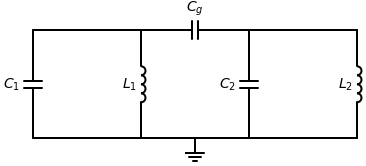

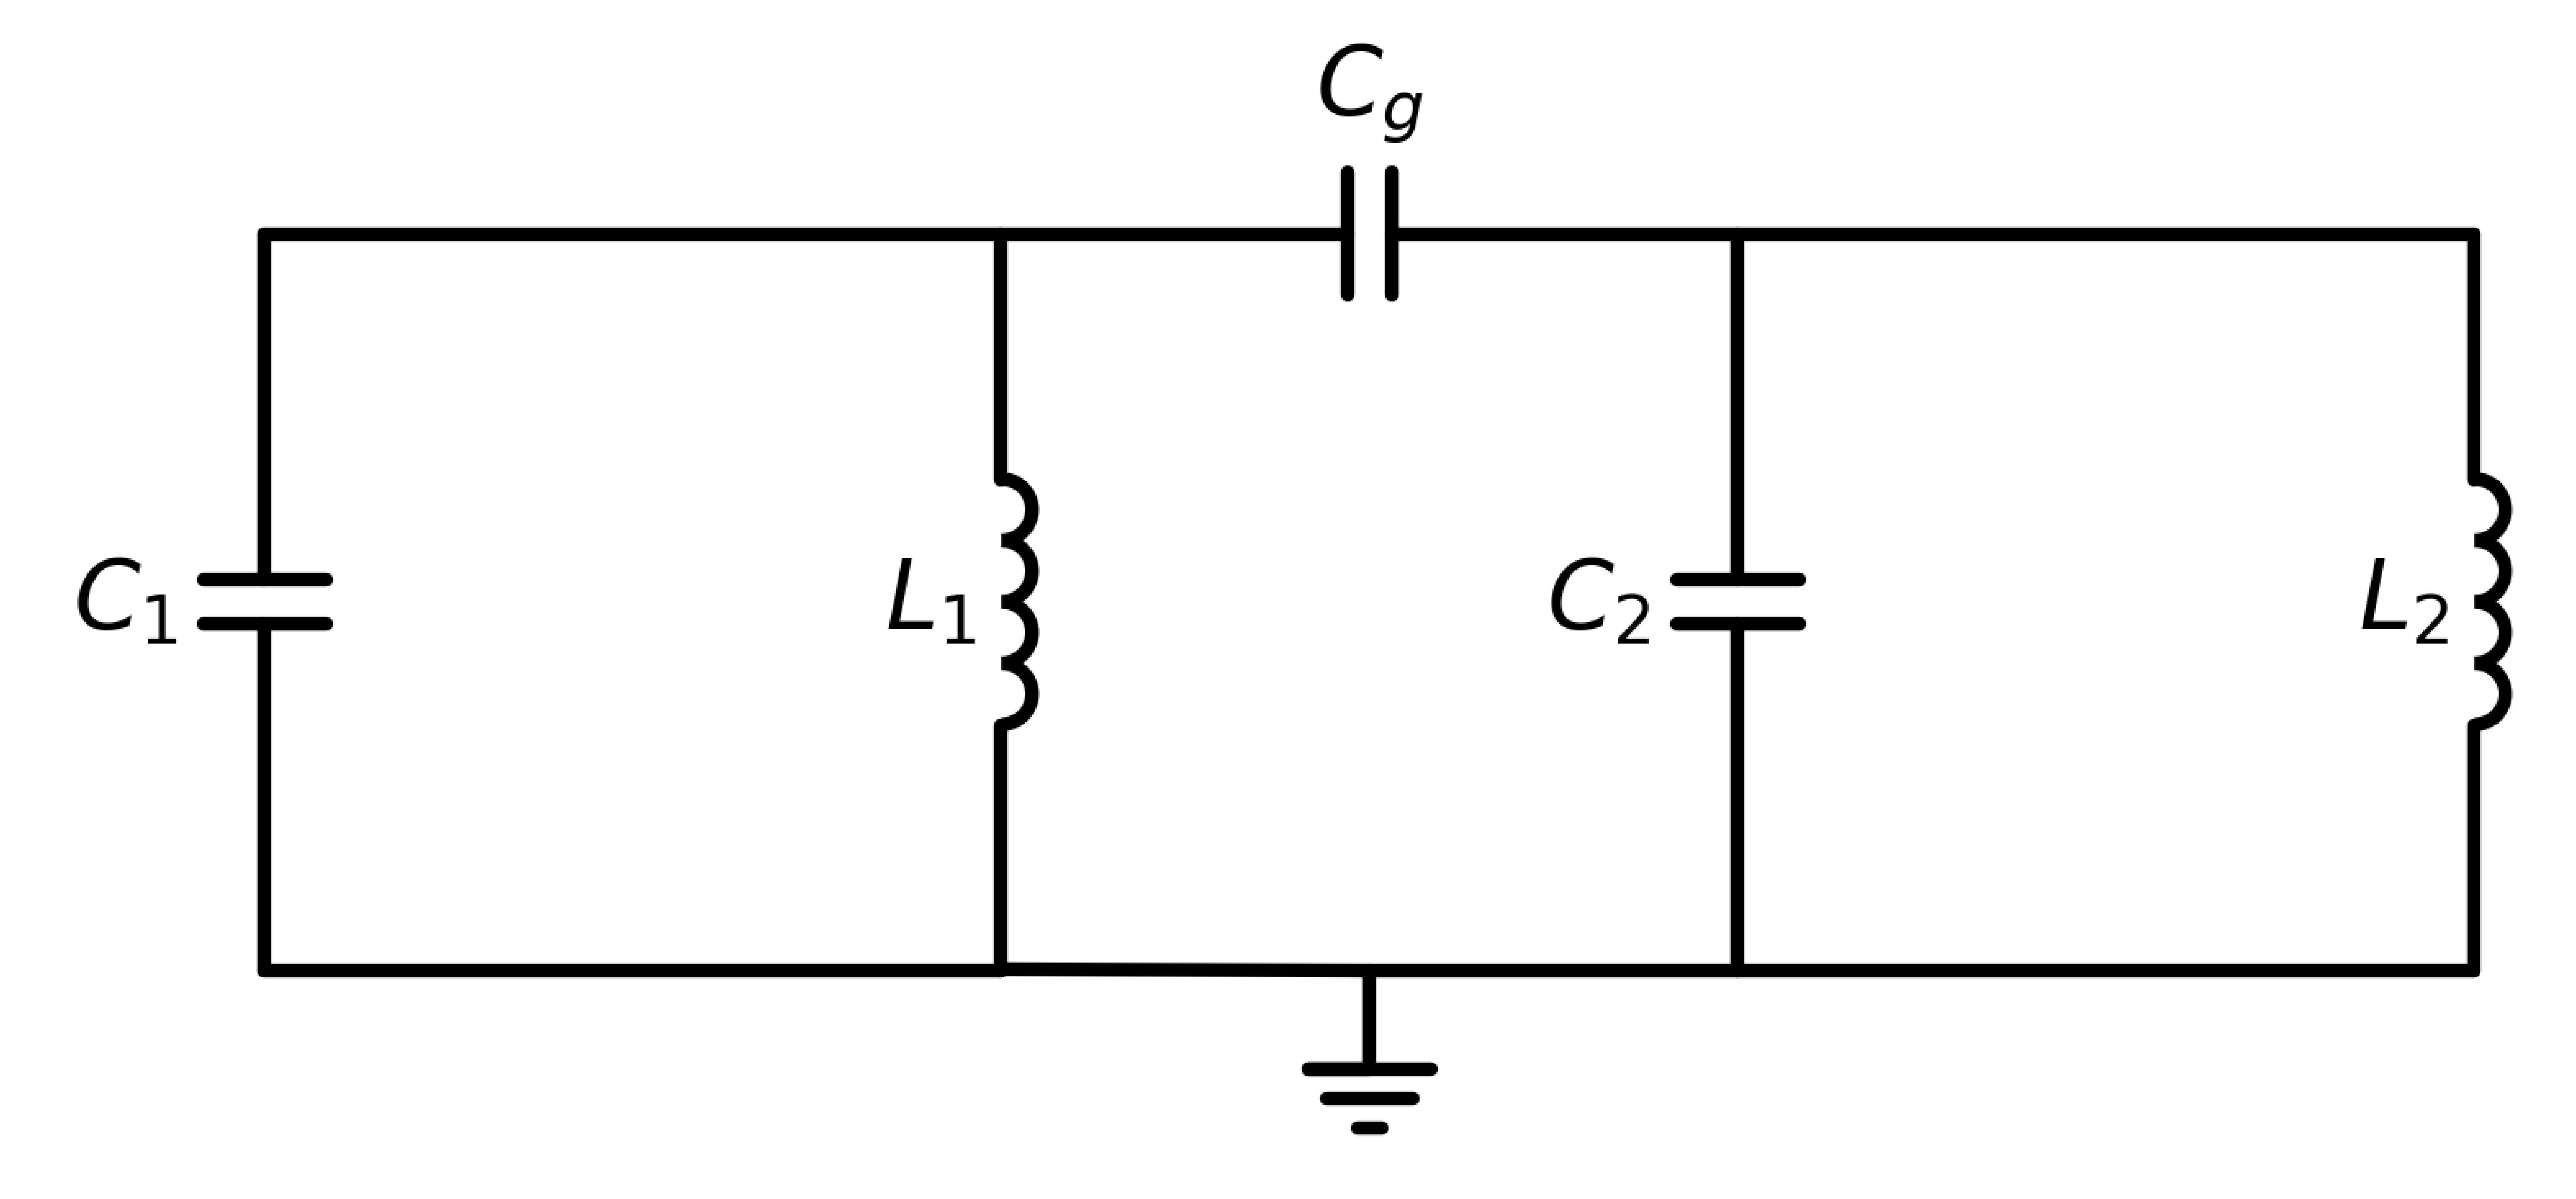

In [17]:
fig, ax = plt.subplots(figsize=(6.5, 3.25), dpi=1000)

with schemdraw.Drawing() as d:
    # Left resonator (qubit):
    d += elm.Capacitor().up().label("$C_1$")  # Gap element to create spacing
    d += elm.Line().right()
    d += elm.Inductor().down().label("$L_1$")
    d += elm.Line().left()
    d += elm.Gap().up()
    d += elm.Gap().right()
    # Coupler:
    d += elm.Capacitor().right().label("$C_g$")
    # Right resonator (qubit):
    d += elm.Line().right()
    d += elm.Inductor().down().label("$L_2$")
    d += elm.Line().left()
    d += elm.Capacitor().up().label("$C_2$")
    d += elm.Gap().down()
    # Ground:
    groundLine = elm.Line().left()
    d += groundLine
    ground = elm.Ground()
    ground.at(groundLine.center)
    d += ground
    d.save("iSwapCircuit.png", dpi=300)  # Change dpi to your desired resolution

# Load the saved image and integrate it into a matplotlib figure
img = Image.open('iSwapCircuit.png')

ax.imshow(img)
ax.axis('off')  # Hide axes for a clean look

plt.tight_layout()

fig.savefig('fig2p12.pdf')

# Figure 2.13

This figure should show a simulated iSWAP chevron. Would be good to label the times associated with iSWAP and square-root-of-iSWAP.